# An in-depth research on Portuguese students of two different  high schools

<ol>

<li><a href='#the_destination1'>Used dateset's data explain </a></li>
<li><a href='#the_destination2'>EDA</a></li>
<li><a href='#the_destination3'>Outliers detection and handling</a></li>
- <a href='#the_destination4'>Categorical Features</a>
- <a href='#the_destination5'>Discrete Features</a>
<li><a href='#the_destination6'>Splitting in train and test sets</a></li>
<li><a href='#the_destination7'>Features Selection</a></li>
<li><a href='#the_destination8'>Scoring metric and spotcheck function</a></li>
<li><a href='#the_destination9'>Hyperparameters Tuning</a></li>
<li><a href='#the_destination10'>Models evaluating with Learning curve</a></li>
<li><a href='#the_destination11'>Predictions</a></li>
<li><a href='#the_destination12'>Residuals analysis, where we fail the most?</a></li>
<li><a href='#the_destination13'>Features Importance</a></li>



In [1]:
from sklearn.datasets import load_wine
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from sklearn.model_selection import  learning_curve
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
warnings.filterwarnings("ignore")

%matplotlib inline



In [2]:
df = pd.read_csv("../kaggle/student-por.csv")
pd.set_option('display.max_columns', None) # impostazione per visualizzare tutte le colonne dataset 

<a id='the_destination1'></a>
# USED DATASET EXPLAIN

## GOL:
We are interestend to predict  the final exam vote(G3,school subject: Portuguese) for some students of 2 superior schools in Portugal, building a model around the following 33 features:
#### __BOOLEAN FEATURES__
1. schoolsup - extra educational support (yes or no)
1. famsup - family educational support (yes or no)
1. paid - extra paid lessons within the course subject ( portuguese) ( yes or no)
1. activities - extracurricular activities (yes or no)
1. nursery - kindergarten attended (yes or no)
1. higher - wants to go to higher education ( yes or no)
1. internet - Internet access at home ( yes or no)
1. romantic - with a romantic relationship ( yes or no)

#### __CATEGORICAL NOMINAL FEATURES__
1. school - school for students ( 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
1. sex - gender of the student ( 'F' - female or 'M' - male)
1. address - student home address type ('U' - urban or 'R' - rural)
1. famsize - family size ('LE3' - less than or equal to 3 or 'GT3' - greater than 3)
1. Pstatus - cohabitation status of parent ( 'T' - cohabiting or 'A' - separated)
1.Mjob - mother's job ( "teacher", "health", civil "services" , "at home" or "other")
1.Fjob - father's job ( 'teacher', 'healthcare', civil 'services' , 'at_home' or 'other')
1.reason - reason for choosing this school ( close to "home", school "reputation", preference "course" or "other")
1. guardian - student guardian ( 'mother', 'father' or 'other')

#### __CATEGORICAL ORDINAL FEATURES__
1. Medu - mother's education ( 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education, or 4 - higher education)
1. Fedu - father's education ( 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
1. traveltime - travel time from home to school ( 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour or 4 - >1 hour)
1. studytime - weekly study time ( 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours or 4 - >10 hours)
1. failures - number of failures passed (0,1,2,3)
1. famrel - quality of family relationships (from 1 - very bad to 5 - excellent)
1. freetime - free time after school ( from 1 - very low to 5 - very high)
1. goout - hang out with friends ( from 1 - very low to 5 - very high)
1. Dalc - alcohol consumption on working days (from 1 - very low to 5 - very high)
1. Walc - weekend alcohol consumption (from 1 - very low to 5 - very high)
1. health - current state of health (from 1 - very bad to 5 - very good)

#### __DISCRETE FEATURES__
1. age - age of the student (from 15 to 22)
1. absences - number of school absences ( from 0 to 93)
1. G1 - first term mark (from 0 to 20)
1. G2 - second period grade (from 0 to 20)
1. G3 - final grade (from 0 to 20, __TARGET__ output)

### __NUMBER OF STUDENTS__

1.N= 649

### __KIND OF VARIABLES EXPLAIN__
1. __BOOLEAN__:A Boolean variable has only two possible values: true or false.So presence or not presence of an attribute
1.__CATEGORICAL NOMINAL FEATURES__: A nominal feature has  a non-hierarchical distinction, such as Guardian.So there is no order within.
1. __CATEGORICAL ORDINAL FEATURES__: A ordinal feature follow a hierarchy, such as freetime, so the higher is the value the higher is the amount of freetime avaible
1.__DISCRETE FEATURES__:A discrete variable can assume only a finite number of real values within a given interval








<a id='the_destination2'></a>
# EDA

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [4]:
df.shape

(649, 33)

### __We have no missing value in this dataset__

In [5]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:


num_columns = ['age', 'absences', 'G1', 'G2', 'G3']
cat_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
              'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc','Walc',
              'health']

In [7]:
print('VALUES OF THE CATEGORICAL VARIABLES')
for col in cat_columns:
    print(f'Unique value of {col}: {df[col].unique()}')
    

VALUES OF THE CATEGORICAL VARIABLES
Unique value of school: ['GP' 'MS']
Unique value of sex: ['F' 'M']
Unique value of address: ['U' 'R']
Unique value of famsize: ['GT3' 'LE3']
Unique value of Pstatus: ['A' 'T']
Unique value of Medu: [4 1 3 2 0]
Unique value of Fedu: [4 1 2 3 0]
Unique value of Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Unique value of Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
Unique value of reason: ['course' 'other' 'home' 'reputation']
Unique value of guardian: ['mother' 'father' 'other']
Unique value of traveltime: [2 1 3 4]
Unique value of studytime: [2 3 1 4]
Unique value of failures: [0 3 1 2]
Unique value of schoolsup: ['yes' 'no']
Unique value of famsup: ['no' 'yes']
Unique value of paid: ['no' 'yes']
Unique value of activities: ['no' 'yes']
Unique value of nursery: ['yes' 'no']
Unique value of higher: ['yes' 'no']
Unique value of internet: ['no' 'yes']
Unique value of romantic: ['no' 'yes']
Unique value of famrel: [4 5 3 1 2]
Unique

In [8]:
print('RANGE OF THE NUMERIC (DISCRETE)VARIABLES')
for col in num_columns:
    print(f'Range value of {col} : {df[col].min()} - {df[col].max()}')

RANGE OF THE NUMERIC (DISCRETE)VARIABLES
Range value of age : 15 - 22
Range value of absences : 0 - 32
Range value of G1 : 0 - 19
Range value of G2 : 0 - 19
Range value of G3 : 0 - 19


In [9]:

#already dicotomic
df['schoolGP']=df['school'].replace({'MS':0,'GP':1})
df['male']=df['sex'].replace({'F':0,'M':1})
df['addressUrban']=df['address'].replace({'R':0,'U':1})
df['famsize_major3']=df['famsize'].replace({'LE3':0,'GT3':1})
df['cohabitant_parents']=df['Pstatus'].replace({'A':0,'T':1})
df['schoolsup']=df['schoolsup'].replace({'no':0,'yes':1})
df['paid']=df['paid'].replace({'no':0,'yes':1})
df['nursery']=df['nursery'].replace({'no':0,'yes':1})
df['higher']=df['higher'].replace({'no':0,'yes':1})
df['internet']=df['internet'].replace({'no':0,'yes':1})
df['romantic']=df['romantic'].replace({'no':0,'yes':1})
df['famsup']=df['famsup'].replace({'no':0,'yes':1})
df['activities']=df['activities'].replace({'no':0,'yes':1})


#categorical 
df= pd.get_dummies(df, columns = ['Mjob','Fjob','reason','guardian'])


df.drop(columns=['school','sex','address','famsize','Pstatus'],inplace=True)

Here i take all dicotomic categorical nominal features and I replaced the variable name with 1 of its classes it can have inside it. If this new variable has value 1 the student has the characteristic of the new variable name. If we find value 0 then it has the value of the other class it could have before transformation. So for example if the new variable male is 1 for a student, he is a male.If it is 0 is a female.
From the remaining categorical nominal features that are not dicotomic i made some dummies.The latter are boolean features for every class of these features.So for guardian now I have 3 boolean feature:guardian_father, guardian_mother,guardian other.

In [10]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,schoolGP,male,addressUrban,famsize_major3,cohabitant_parents,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.00000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,0.060092,0.485362,0.802773,0.893683,0.767334,0.368259,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009,0.651772,0.409861,0.696456,0.704160,0.876733,0.208012,0.073960,0.397535,0.209553,0.11094,0.064715,0.035439,0.565485,0.278891,0.055470,0.439137,0.229584,0.11094,0.220339,0.235747,0.701079,0.063174
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,0.237841,0.500171,0.398212,0.308481,0.422857,0.482704,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656,0.476776,0.492187,0.460143,0.456771,0.328996,0.406199,0.261908,0.489766,0.407304,0.31430,0.246212,0.185030,0.496075,0.448799,0.229072,0.496665,0.420890,0.31430,0.414795,0.424792,0.458138,0.243464
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### DataFrame composition by age and G3 votes

Text(0.5, 1.0, 'AGE COMPOSITION')

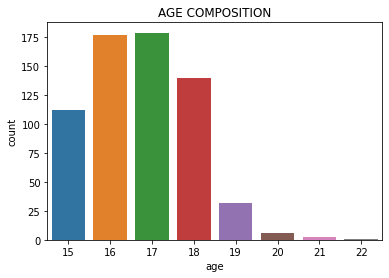

In [11]:
sns.countplot(x ='age', data = df)
plt.title('AGE COMPOSITION')

Text(0.5, 1.0, 'G3 COMPOSITION')

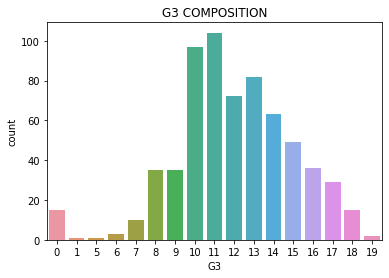

In [12]:
sns.countplot(x ='G3', data = df)
plt.title('G3 COMPOSITION')

As we see in the graphs above the major classes in the age histplot are 15,16,17,18. The students that for sure lost at least one year are really few. In the G3 graph instead we can see a few things: the  majority of votes are concentred between 10 and 14(where 10 rappresent the sufficient vote to pass the year) and there is a relativy big group that took 0.The mode class is between 10 and 11

<a id='the_destination3'></a>
# OUTLIERS DETECTION AND HANDLING

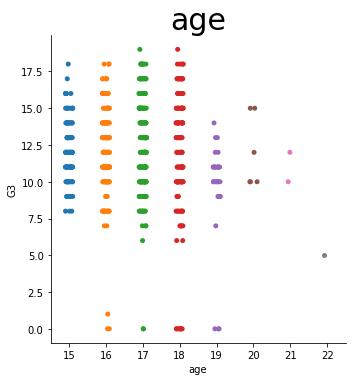

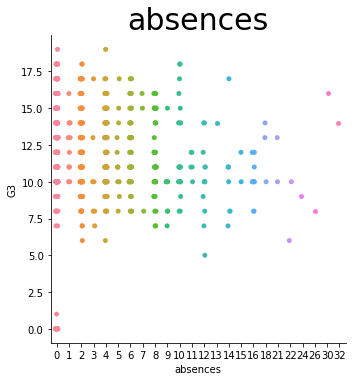

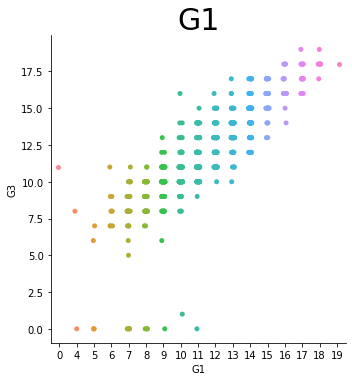

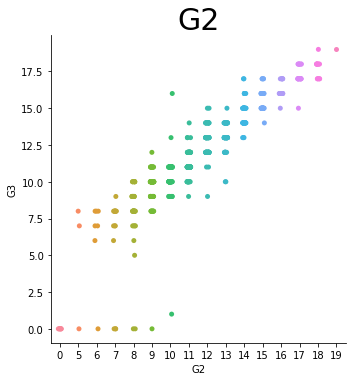

In [13]:
for z in df[num_columns].columns:
    if z != 'G3':
        sns.catplot(x=z, y="G3", data=df)
        plt.title(z, size=30)

G1 and G2 show clearly a positive correlation with G3 but even different outliers.Age show a little negative corelation but also a high variance.In the absences we can see a clear path of negative correlation with g3 soiled by some outliers.It seems like every student that took 0 in G3 is an outliers very out of trend in respect of other student. This assumption is underlined in the absences graph, infact those who got 0 in G3 have always 0 absences and this is strange. Maybe those student have some deficit so we can go deeper in this.There is one more interesting thing in the absences graph; few student with very high absences(more than 30)  got  more than 13 in G3. Even those are out of trend and seems to soil the negative correlation between G3 and absences.They seem more intelligent of the mean.

Text(0.5, 1.0, 'AGE VS G3')

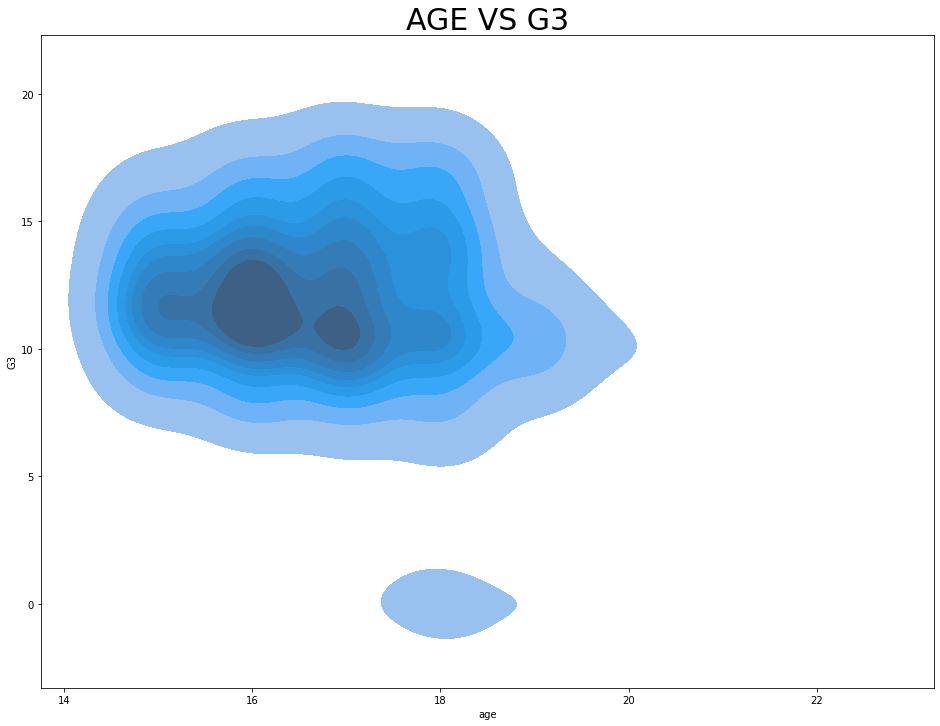

In [14]:
fig = plt.subplots(figsize = (16,12))
sns.kdeplot( x='age',y='G3',fill=True,data=df)
plt.title('AGE VS G3', size=30)

Here we can see even clearly what we are talking about, this group that score 0 is really out of the general trend.I decided to drop at first the only student of 22 years and the other that i baptized more intelligent

In [15]:
df.drop(df[df['age'] >= 22].index, inplace = True)
df.drop(df[df['absences'] >= 28].index, inplace = True)
x=(df.loc[(df['absences']==0) & (df['G3'] <3)])


Now we can go deeper to analyze the students with 0 absences and a G3 vote less than 1

In [16]:
x.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,schoolGP,male,addressUrban,famsize_major3,cohabitant_parents,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,16.000000,16.000000,16.000000,16.00000,16.000000,16.000000,16.0000,16.000000,16.0000,16.000000,16.000000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000,16.0000,16.000000,16.000000,16.000,16.000000,16.000000,16.000000,16.0,16.000000,16.0000,16.000000,16.0000,16.0,16.000000,16.000,16.0000,16.000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0000
mean,17.687500,2.312500,1.750000,1.75000,1.500000,0.812500,0.0625,0.312500,0.0625,0.500000,0.875000,0.687500,0.562500,0.625,3.875000,3.625000,3.187500,2.000000,2.750000,3.875000,0.0,7.250000,4.187500,0.0625,0.125000,0.562500,0.375,0.875000,0.875000,0.250000,0.0,0.562500,0.0625,0.125000,0.0625,0.0,0.500000,0.375,0.0625,0.375,0.187500,0.312500,0.125000,0.250000,0.687500,0.0625
std,1.014479,1.195478,0.856349,0.68313,0.516398,0.834166,0.2500,0.478714,0.2500,0.516398,0.341565,0.478714,0.512348,0.500,1.310216,1.147461,1.682013,1.264911,1.341641,1.360147,0.0,1.879716,3.970202,0.2500,0.341565,0.512348,0.500,0.341565,0.341565,0.447214,0.0,0.512348,0.2500,0.341565,0.2500,0.0,0.516398,0.500,0.2500,0.500,0.403113,0.478714,0.341565,0.447214,0.478714,0.2500
min,16.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.0,4.000000,0.000000,0.0000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0000,0.0,0.000000,0.000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,17.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.0000,0.000000,0.0000,0.000000,1.000000,0.000000,0.000000,0.000,3.000000,3.000000,1.750000,1.000000,1.750000,3.000000,0.0,6.500000,0.000000,0.0000,0.000000,0.000000,0.000,1.000000,1.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0000,0.0,0.000000,0.000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,18.000000,2.000000,2.000000,2.00000,1.500000,1.000000,0.0000,0.000000,0.0000,0.500000,1.000000,1.000000,1.000000,1.000,4.000000,3.500000,3.000000,1.500000,3.000000,4.500000,0.0,7.000000,5.500000,0.0000,0.000000,1.000000,0.000,1.000000,1.000000,0.000000,0.0,1.000000,0.0000,0.000000,0.0000,0.0,0.500000,0.000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0000
75%,18.000000,3.250000,2.000000,2.00000,2.000000,1.000000,0.0000,1.000000,0.0000,1.000000,1.000000,1.000000,1.000000,1.000,5.000000,5.000000,5.000000,2.500000,3.250000,5.000000,0.0,8.000000,7.250000,0.0000,0.000000,1.000000,1.000,1.000000,1.000000,0.250000,0.0,1.000000,0.0000,0.000000,0.0000,0.0,1.000000,1.000,0.0000,1.000,0.000000,1.000000,0.000000,0.250000,1.000000,0.0000
max,19.000000,4.000000,4.000000,3.00000,2.000000,3.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.0,11.000000,10.000000,1.0000,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,0.0,1.000000,1.0000,1.000000,1.0000,0.0,1.000000,1.000,1.0000,1.000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000


I initially thought this anomalous group was with disorders or disabilities but now I am convinced that it is more of a small group in its own right. What these people have most in common are: most have been rejected at least once, they study very little max 5 hours weekly but on average less, he is not helped by the school and only 1 out of 3 by the family, they have never taken tutoring, they do well in the family which is almost always large and with parents who are not separated, they are almost all from the same school, they live mostly in rural but not distant areas, almost all of them have attended kindergarten, have a good social life and some particularly like to drink. Almost 70% would like to attend university but it seems to me a poorly reasoned response to the survey from their part. In general, their performance drops drastically with the arrival of the warmer seasons


Having got almost all 0, I decide to drop this small group of people who, as we can see from the graph above, are too anomalous compared to the others and would greatly increase my final prediction error. In general, getting 0 in the final exam on a scale of grades from 0-20 making 0 absences seems to me a very strange behavior and very difficult to predict on data never seen before and by keeping these students I risk giving too much weight to some features which for the group of 'normal' students has little power of discrimination.Maybe they were caught copying? Because to get 0 you have to deliver the blank test


In [17]:
s=df.loc[(df['G3']==0)]
s.shape

(15, 46)

This small group consists of only 15 students

In [18]:
df.drop(df.loc[(df['absences']==0) & (df['G3'] <3)].index, inplace=True)

In [19]:
df.shape

(630, 46)

In [20]:
o=(df.loc[(df['absences']==0)])
o.describe()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,schoolGP,male,addressUrban,famsize_major3,cohabitant_parents,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.0,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,16.557018,2.513158,2.271930,1.495614,2.039474,0.122807,0.122807,0.605263,0.048246,0.451754,0.842105,0.921053,0.776316,0.320175,4.021930,3.201754,3.039474,1.403509,2.061404,3.526316,0.0,12.214912,12.460526,12.881579,0.631579,0.407895,0.710526,0.671053,0.894737,0.210526,0.100877,0.377193,0.188596,0.122807,0.052632,0.026316,0.535088,0.320175,0.065789,0.438596,0.206140,0.118421,0.236842,0.280702,0.675439,0.043860
std,1.161532,1.200148,1.088871,0.705534,0.814637,0.452898,0.328938,0.489870,0.214756,0.498762,0.365445,0.270250,0.417630,0.467570,0.872715,1.046747,1.119795,0.787784,1.178254,1.440206,0.0,2.655283,2.693314,2.631395,0.483438,0.492525,0.454516,0.470865,0.307567,0.408579,0.301829,0.485750,0.392048,0.328938,0.223788,0.160425,0.499865,0.467570,0.248459,0.497307,0.405423,0.323817,0.426080,0.450331,0.469241,0.205233
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,6.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.0,10.000000,10.000000,11.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.500000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.0,12.000000,12.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,17.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,0.0,14.000000,14.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,21.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.0,19.000000,19.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This is the real trend of those who have 0 absences and as we can see out of almost 230 people the average is clearly higher than 0  (12.88) and is much more in line with the average of the previous grades.I dropped the 19 students that visually are outliers out of trend and replotting the numerical columns vs g3 now the paths are more homogeneous

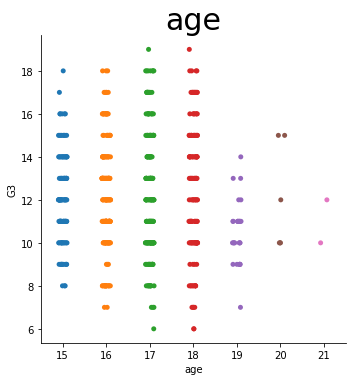

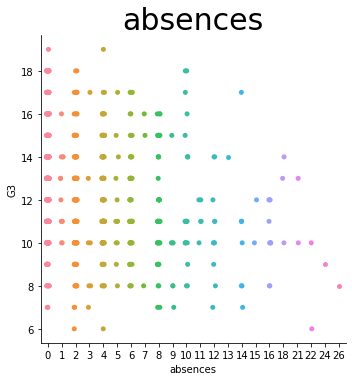

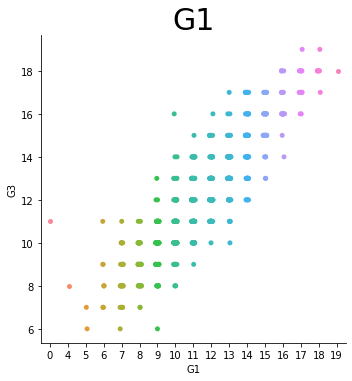

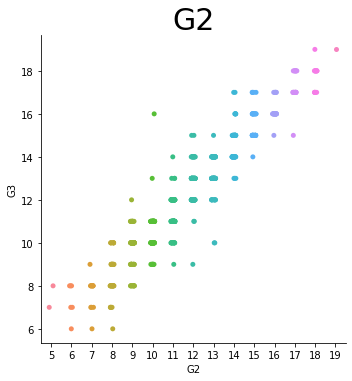

In [21]:
for z in df[num_columns].columns:
    if z != 'G3':
        sns.catplot(x=z, y="G3", data=df)
        plt.title(z,size=30)

Text(0.5, 1.0, 'AGE VS G3')

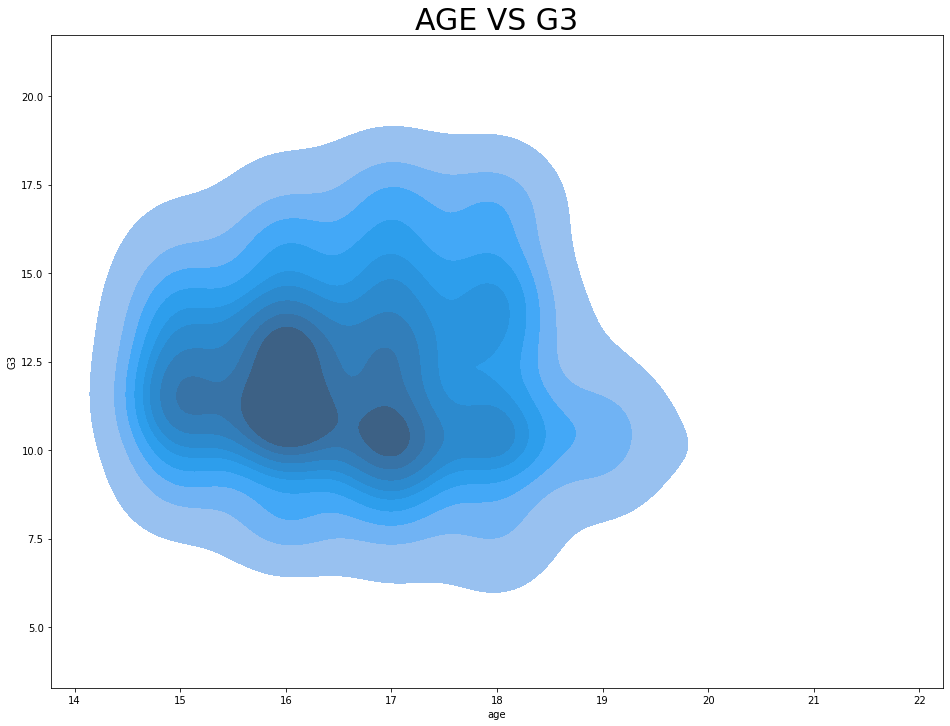

In [22]:
fig = plt.subplots(figsize = (16,12))
sns.kdeplot( x='age',y='G3',fill=True,data=df)
plt.title('AGE VS G3', size=30)

In [23]:
df=df.sort_values(by = 'G3',ascending=False)

<a id='the_destination4'></a>
# Categorical Features

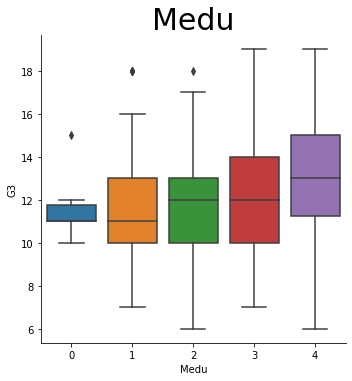

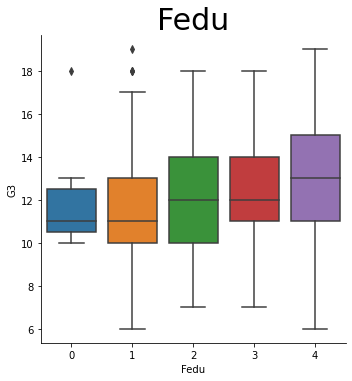

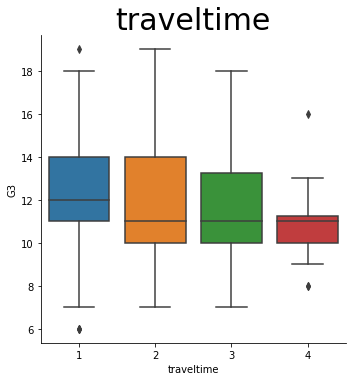

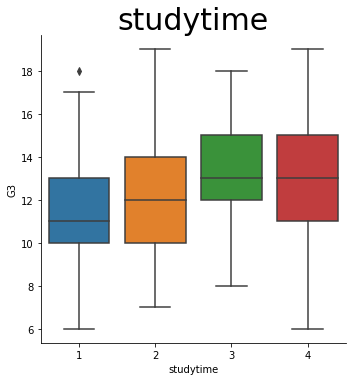

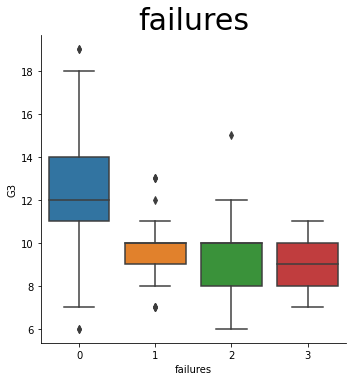

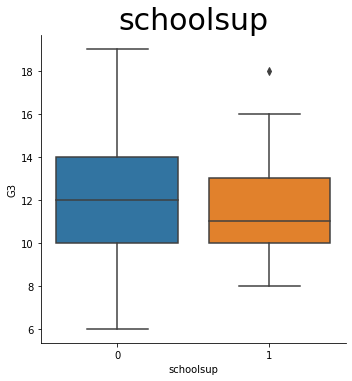

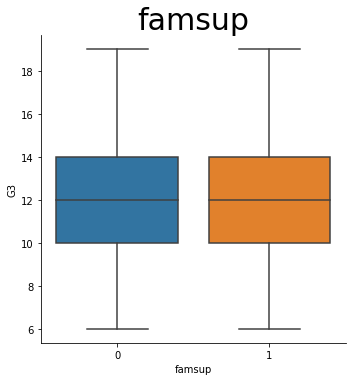

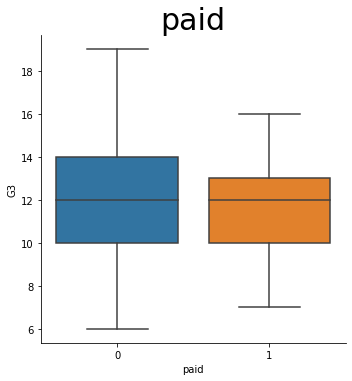

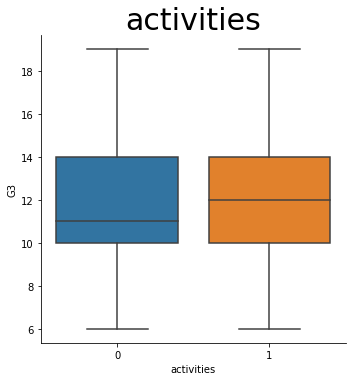

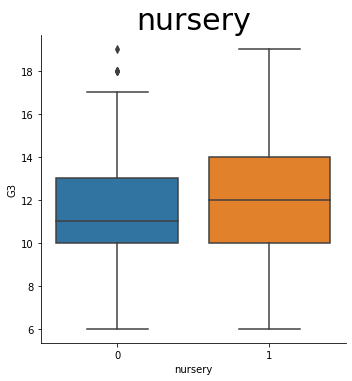

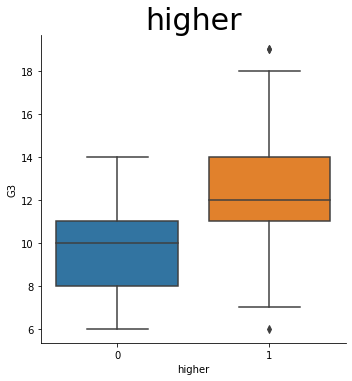

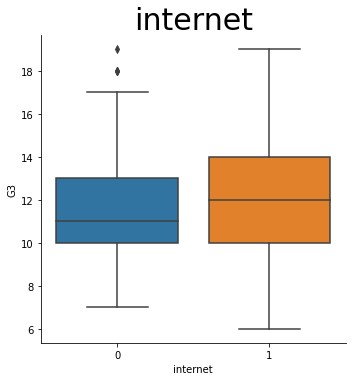

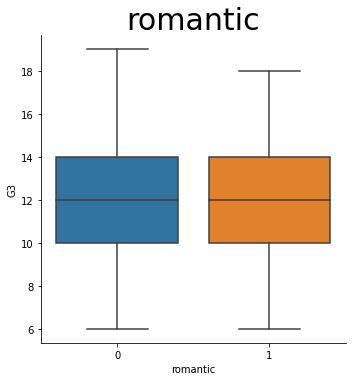

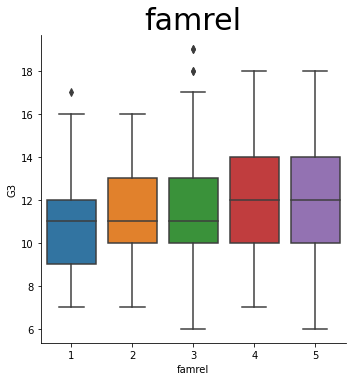

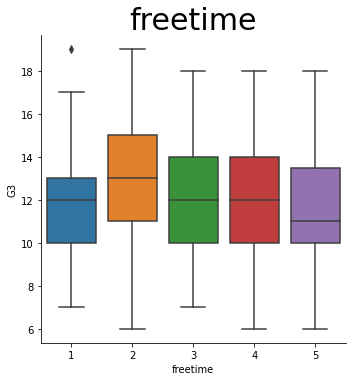

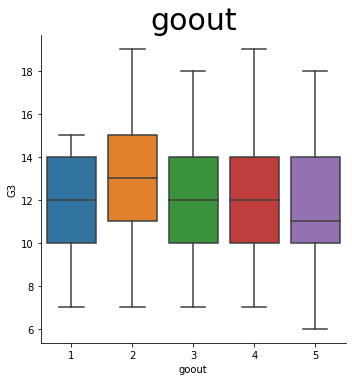

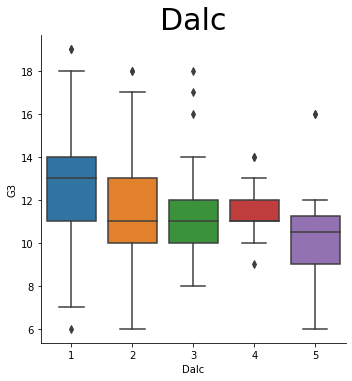

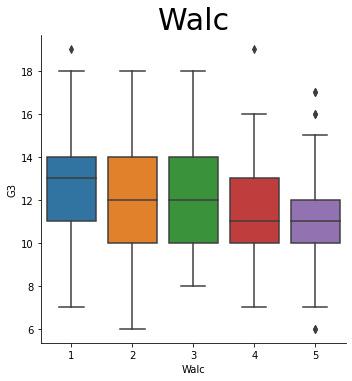

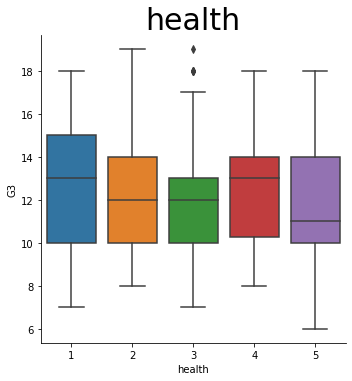

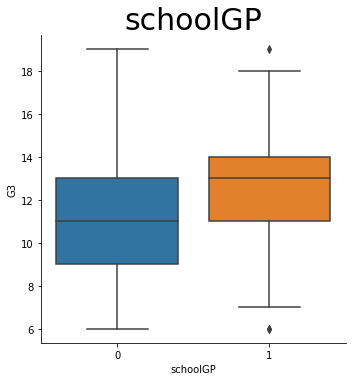

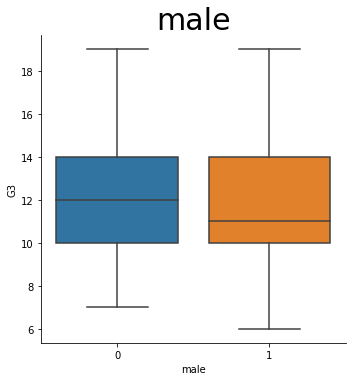

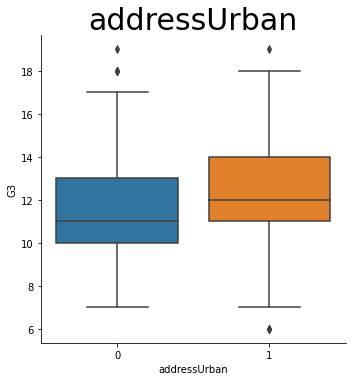

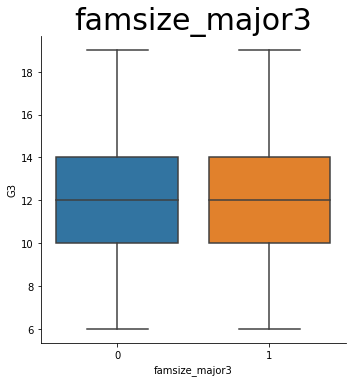

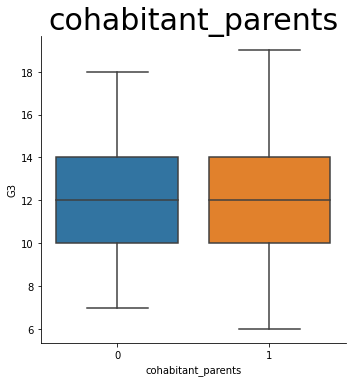

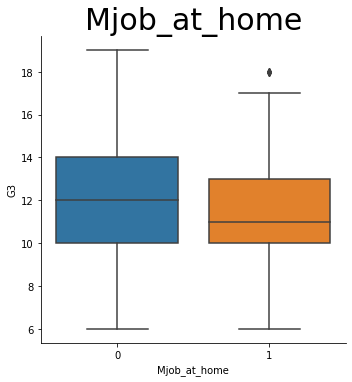

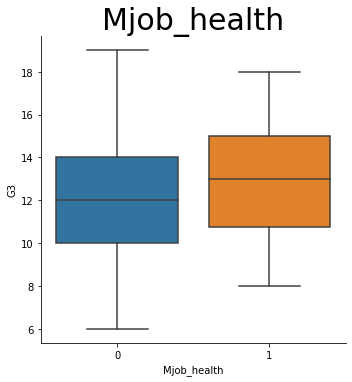

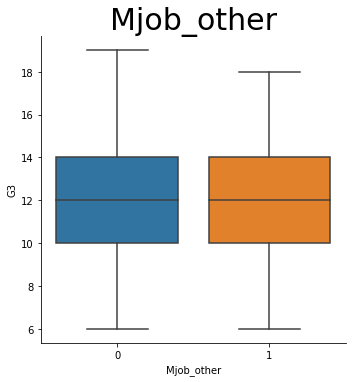

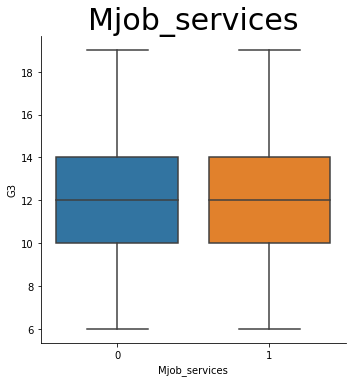

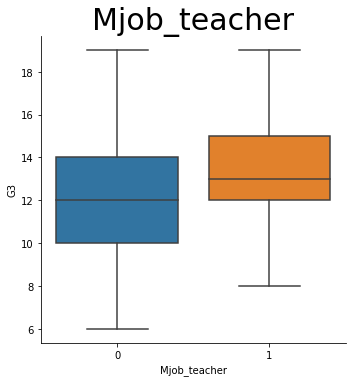

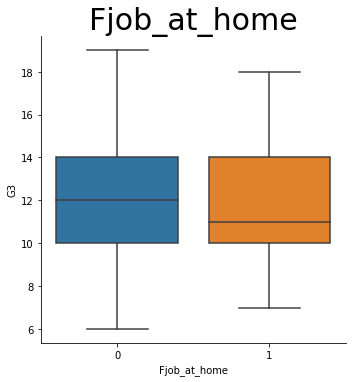

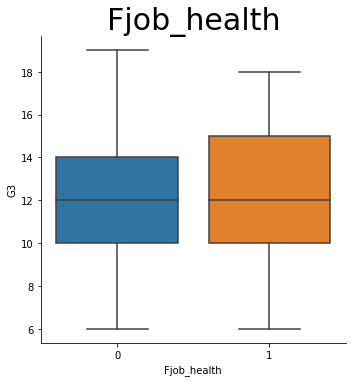

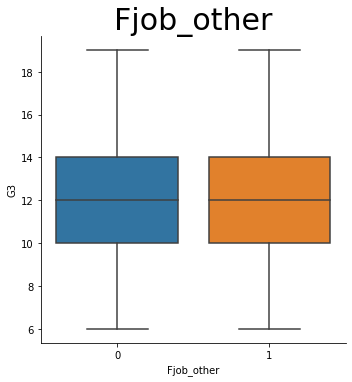

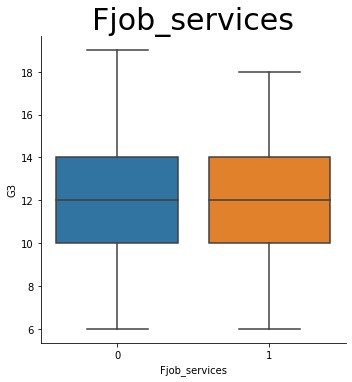

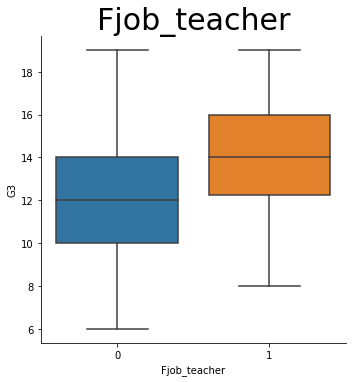

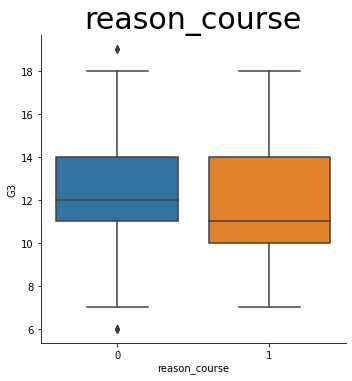

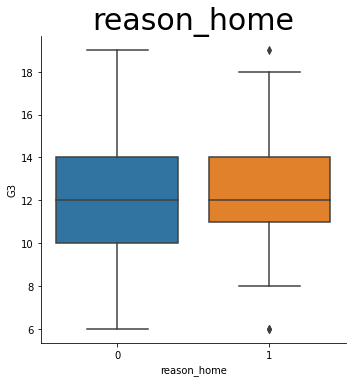

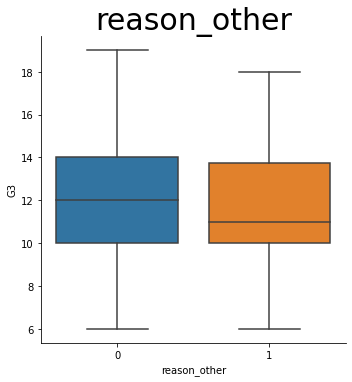

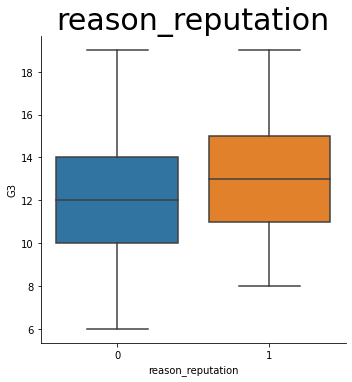

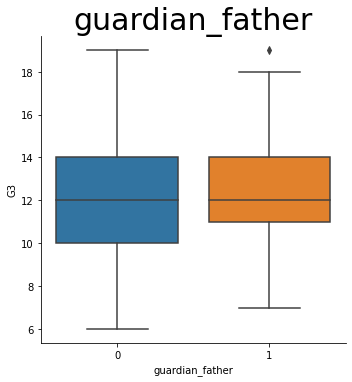

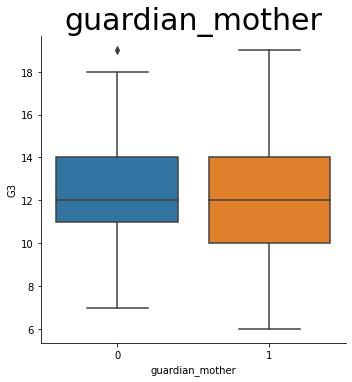

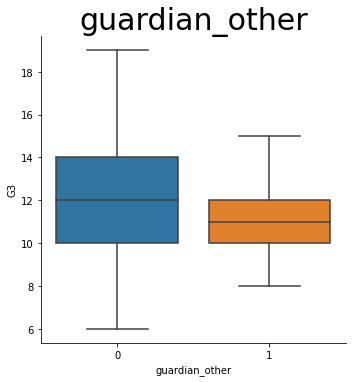

In [24]:
num=['age','absences','G1','G2','G3']
for z in df.columns:
    if z not in num:
        sns.catplot(x=z, y="G3", kind='box', data=df)
        plt.title(z,size=30)

From those boxplot we can see that the probably worse features are dicotomic, they are:
'cohabitant_parents','familisize_major3','famsup','Fjob_other','Fjob_service','Mjob_service',Mjob_other'.Intuitively if your mather or father work in service or other areas of work just in rare case will affect the  child's grade point average directly.Choabitant parents and a family major of 3 are status that seems not affect the grade of the childs.Famsup seems surprisingly not predictive.Even romantic seems to be not very predictive. I think it might be very boring to read every observation of every variable from the above boxplots, so I only mentioned the worst ones, for the others I need a deeper inspection because many of them look like good predictors.


# Are the above features really bad predictors?

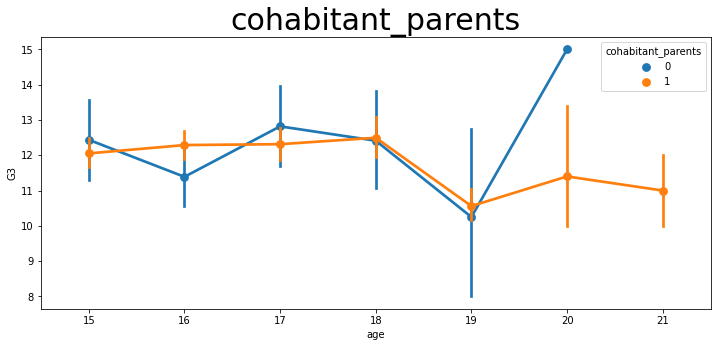

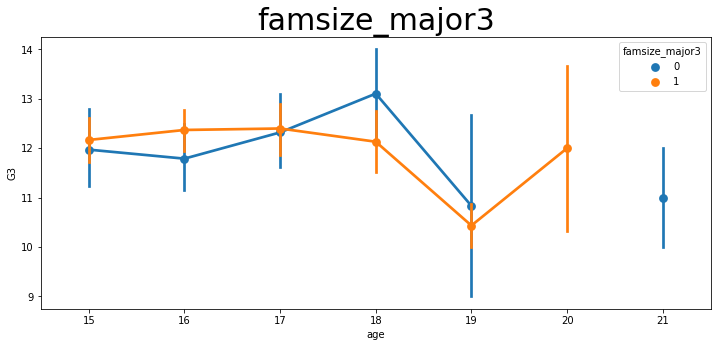

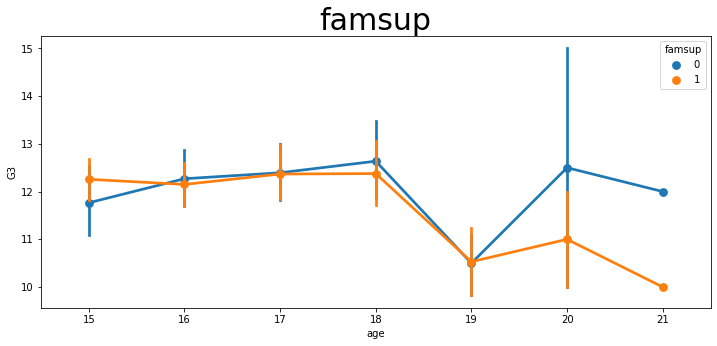

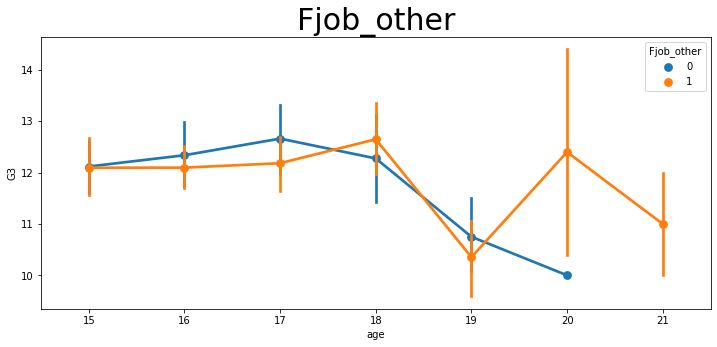

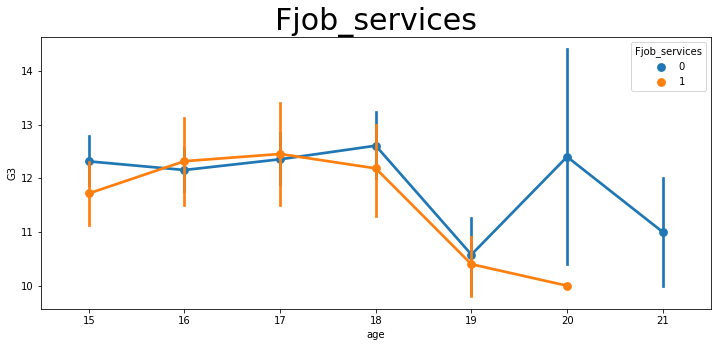

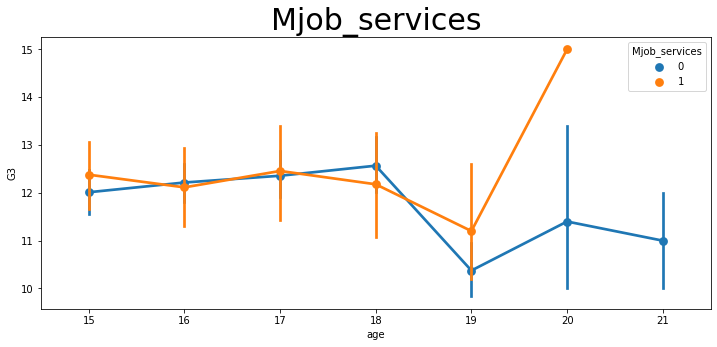

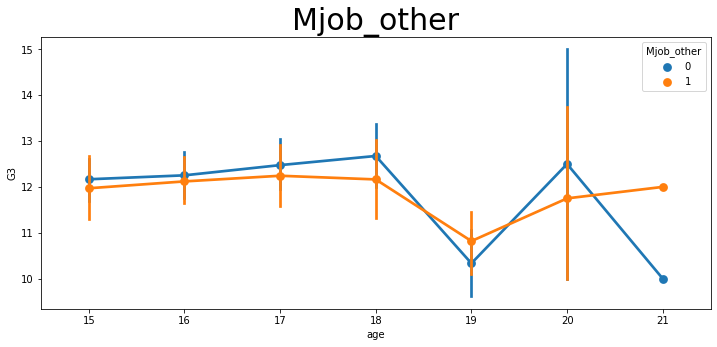

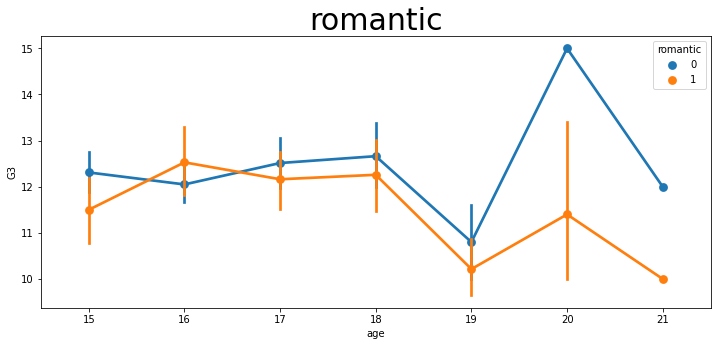

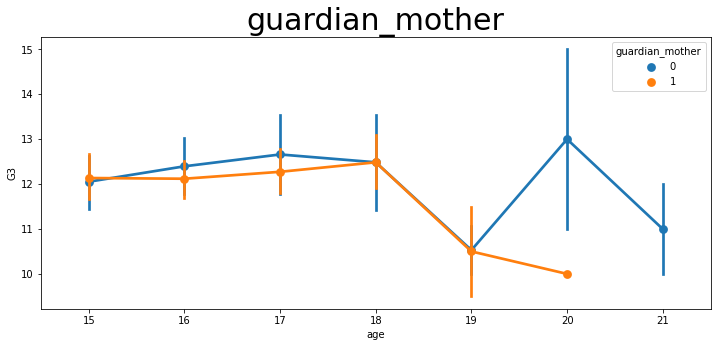

In [25]:
list=['cohabitant_parents','famsize_major3','famsup','Fjob_other',
      'Fjob_services','Mjob_services','Mjob_other','romantic','guardian_mother']
def pointplot(list,df):
    for i in list:
        #since we want different figure we add plt.figure
        plt.figure(figsize=(12,5))
        plt.title(i, size=30)
        sns.pointplot(data=df, x="age", y="G3",hue=i)
pointplot(list,df)

None of these features seems to matter in the age where we have more samples(very simil trend in each hue), but almost all seems to matter after the age increase to 19.Since we have few samples after age of 19 they could help us to be more able to generalize in those frequency of age(19-21) on unseen data but not very useful for the majority of students.


In [26]:
df.loc[(df['age']> 18)].shape

(37, 46)

In fact just 37 students are over 18 years of age while the rest fall into the 15-18 range

<a id='the_destination5'></a>
## DISCRETE FEATURES

Text(0.5, 1.0, 'Correlation Matrix')

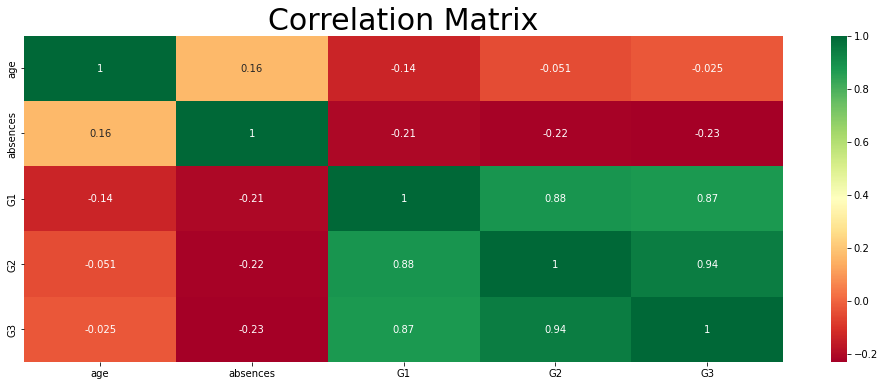

In [27]:
fig = plt.subplots(figsize = (17,6))
sns.heatmap(df[num_columns].corr(),annot=True,cmap="RdYlGn")
plt.title("Correlation Matrix", size=30)

As we said above g1 and g2 have a very strong positive correlation with G3, absences a decent negative correlation with g3 and age has a  almost null negative correlation with g3

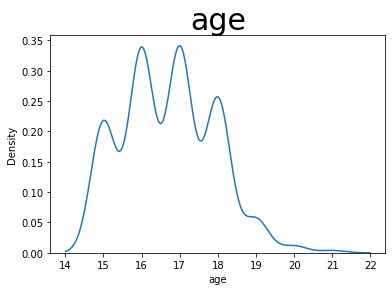

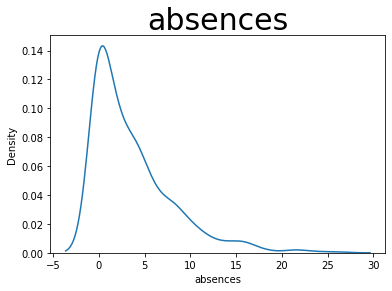

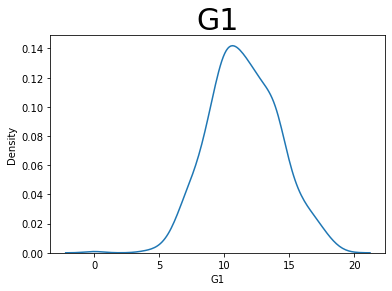

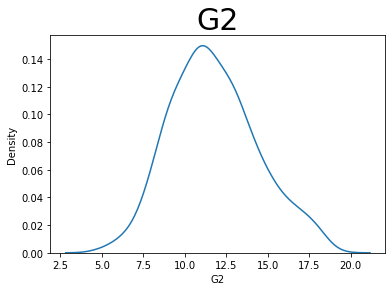

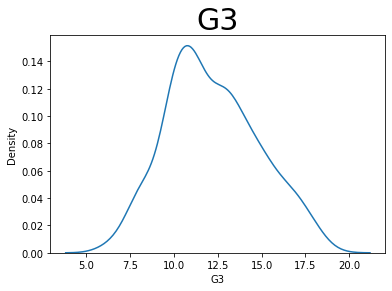

In [28]:
for z in df[num_columns].columns:
    plt.figure()
    sns.kdeplot(x=z, data=df)
    plt.title(z, size=30)

The graphs of the three votes(G1,G2,G3) show almost a gaussian distribution with mean near 11.
Since Age has a poor correlation with G3 i decided to bin it and dummy it to see if 1 of the new variables (for example age major of 18) could be a good discriminant in linear regression and not just for this. Since Random forest tend to introduce bias for continues and multimodal variable i prefer to create some dummy from age.A similar argument applies to absences that i decided after this visualization to divide in 3 binary variables:absences from 0 to 10, from 10 to 20, 20+. I'll do this feature engineering after the last few plots.

### SINCE WE WERE INTERESTED TO SEE THE ALCHOOL USE FROM THE STUDENTS IN THIS NOTEBOOK  WE DO FEW MORE PLOT

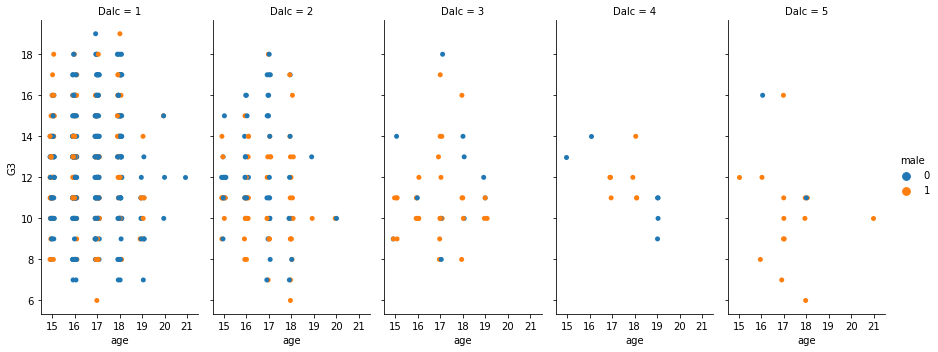

In [29]:
sns.catplot(data=df, x="age", y="G3", hue="male", col="Dalc", aspect=.5)


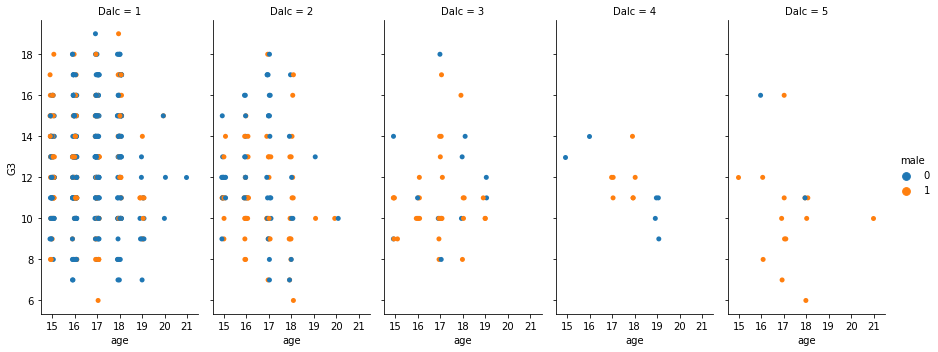

In [30]:
sns.catplot(data=df, x="age", y="G3", hue="male", col="Dalc", aspect=.5)


We can see that for low values of drinking both on weekends and on weekdays we have a higher concentration of girls while for more extreme values we have more boys, so in general boys drink more or at least reach more extreme values. This plots give us a visualization like dalc and walc are continues feature and we can see that both are negativily correlated with G3 (the more you drink the less you take on the exam, in mean)

In [31]:
#Resetting the index
df.reset_index().drop(columns=['index'])
#binnin age and absences
df['age']=df['age'].replace({19:'19+',20:'19+',21:'19+',22:'19+'})
df['absences']=pd.cut(df['absences'],[0,10,20,32],labels=['0_10','10_20','20+'])
#getting dummy from bins
df= pd.get_dummies(df, columns = ['age','absences'])





<a id='the_destination6'></a>
# Splitting in train and test set

First of all kind of feature selection i start splitting the dataset in trainig and test datasets to prevent any kind of dataleakage in particular in this dataset the train-test contamination.
Validation is a measure of how the model does on data that it hasn’t considered before. It can be corrupted in subtle ways if the validation data affects the preprocessing behavior. By Validation data here we mean the test set . we don't want to select features  based on the test set data which we will then predict.  It's too easy to know the price of an dessert  after looking at the menu

Initially i choosed to split in train and test set  as 70/30, but, after plotting the leraning curves i saw that Svr and RandomForestRegressor could improve their predictions with more data so i changed the proportion in 80/20(train_size/test_size)

In [32]:
y = df.loc[:, ['G3']]
X_train, X_test, y_train, y_test = train_test_split(df, y,
                                                    test_size=0.20,
                                                    random_state=42)

### I'll keep 1 dataset with alle the variables at least for the random forest that can handle multicollinarity very well

In [33]:
X_trainfull=X_train.copy()
X_testfull=X_test.copy()

Text(0.5, 1.0, 'X_train Composition')

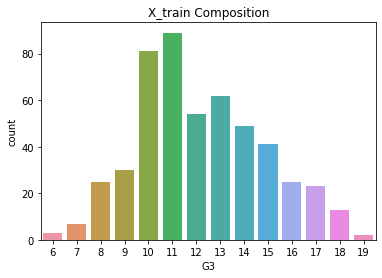

In [34]:
sns.countplot(x ='G3', data = X_train)
plt.title('X_train Composition')

Text(0.5, 1.0, 'X_test Composition')

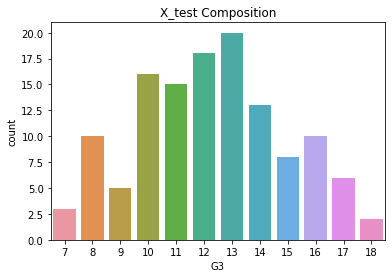

In [35]:
sns.countplot(x ='G3', data = X_test)
plt.title('X_test Composition')

Initially i decided to stratify the train test split based on G3(seeing this regression almost as multiclassification problem) but then i prefer to not do it because i have too few students that got 6 and 19 in G3  so for this dataset will always be difficult to properly predict this two  extreme'class' of grade.

Since  anova and in general almost ml algorithm suffer the presence of high multicollinarity(2 or more independet variable highly corellated between them) i need to drop one in each of the pairs of variable that present high corellation between them. In general here i consider to drop a variable if it shows at least a correlation of 0.6 with another.

Text(0.5, 1.0, 'Correlation Matrix(Training set)')

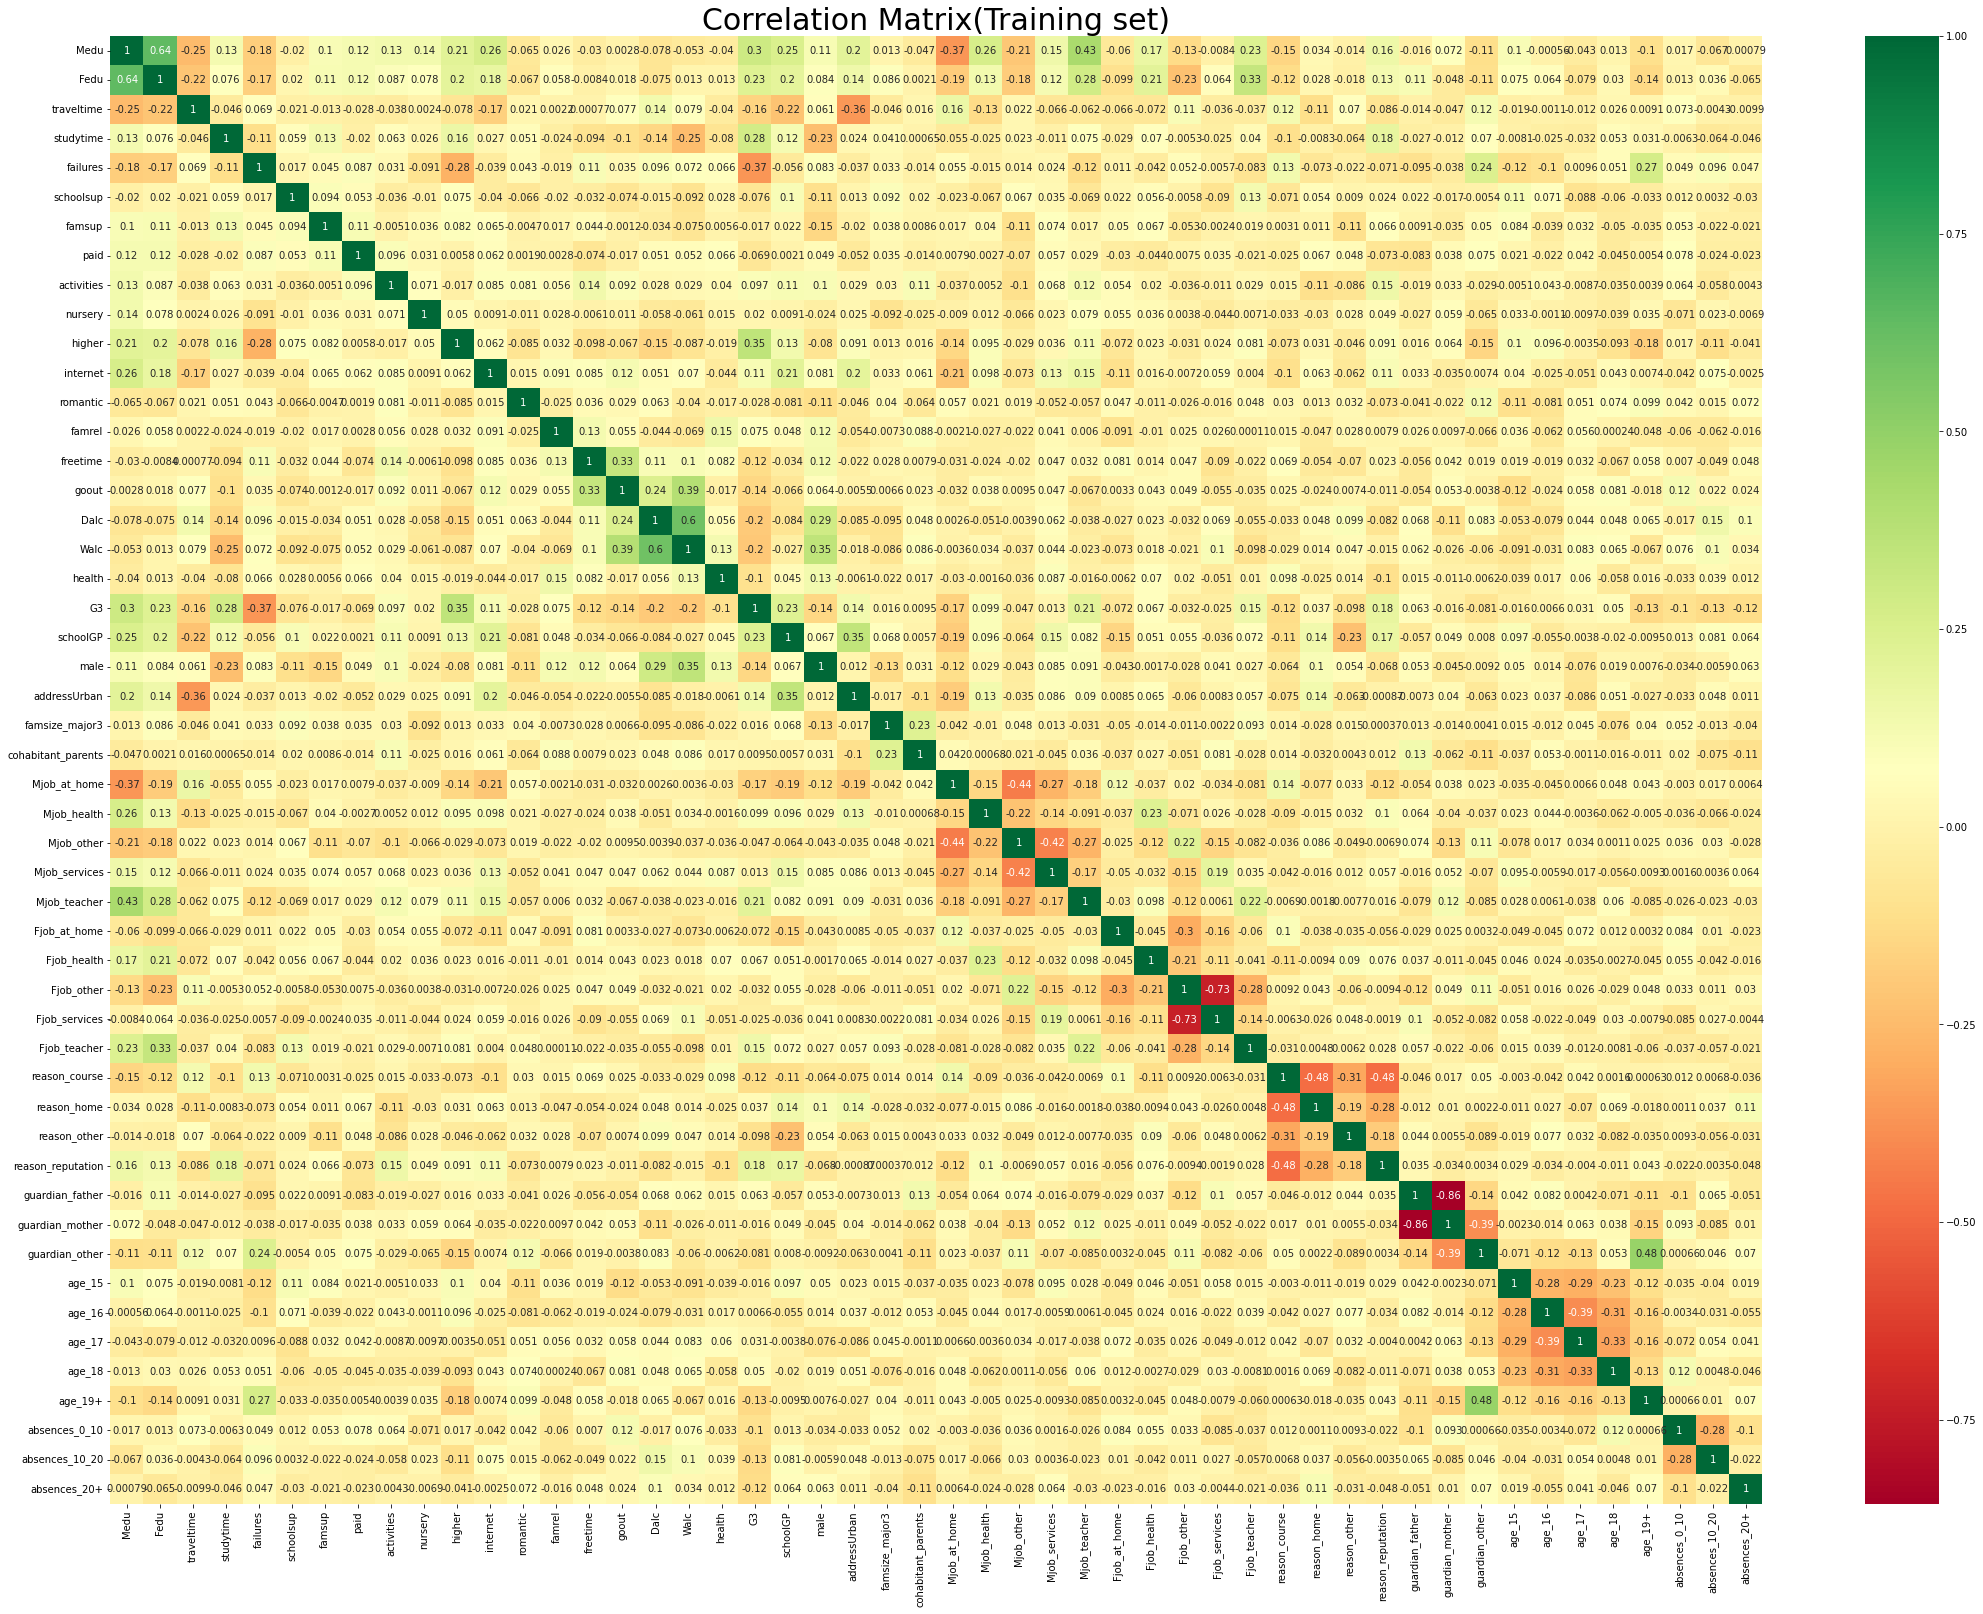

In [36]:
X_train1=X_train.copy()
X_train1.drop(columns=['G1', 'G2'], inplace=True)
fig = plt.subplots(figsize = (37,27))
sns.heatmap(X_train1.corr(method='pearson') ,annot=True,cmap="RdYlGn")
plt.title("Correlation Matrix(Training set)", size=30)

I Exported this graph to better analyze it. The pairs of variables with more than 0.6 correlation are:<ol> 
<li>Fedu/Medu with 0.64 positive correlation</li>
<li>Fjob_other/Fjob_servicise with 0.73 negartive correlation</li>
<li>Guardian_father/Guradian_mother with 0.86 negative correlation</li>
<ol> 


Moving back to the boxplots i decided to drop:'Fjob_other','guardian_father','Fedu'


In [37]:
X_train.drop(columns=['G3','Fjob_other','guardian_father','Fedu'], inplace=True)
X_test.drop(columns=['G3','Fjob_other','guardian_father','Fedu'], inplace=True)

X_train1.drop(columns=['G3','Fjob_other','guardian_father','Fedu'], inplace=True)

X_trainfull.drop(columns=['G3'], inplace=True)
X_testfull.drop(columns=['G3'], inplace=True)

In [38]:
X_train1.shape

(504, 46)

<a id='the_destination7'></a>
# FEATURE SELECTION

We use the anova test to choose which __CATEGORIC__ variables to include in our dataset. The null hypothesis (H0) of this test is the following: all populations have the same mean even if they exhibit different modalities of a categorical variable. So for example for a dichotomous variable such as age over 19 the null hypothesis is that students aged over 19 get the same grade on average (or there are no big differences) compared to those aged less than 19.H1 the alternative hypothesis is that there are differences between those who are over 19 years old compared to the younger ones in the score of the final exam (G3). Since with select k-best I can get the f-value and not the p-value in the output, I will have to use an F-fisher table. The f-value for this test is calculated by decomposing the deviance in the following way: Deviance(between groups having different classes of the tested categorical variable)/k-1 __DIVIDED__ Deviance(within, i.e. the algebraic sum of the internal deviances of each class of that tested categorical variable)/n-k. Where n is the number of students in this case and k the classes of that categorical variable. So for a dichotomous variable k is 2 for an ordinal variable with 5 values k is 5. I will accept as variables to include only those that are greater than the 99th percentile of the respective fisher distribution. I say respective because each distribution of f depends on the degrees of freedom; f(k-1,n-k). Here I have three types of variables: dichotomous (k=2), ordinal with k=4, ordinal with k=5. N is large enough (>500) to consider the last value in the tables(in fact table f after the second degree of freedom exceeds 200 generalizes all higher values as infinity). Looking at the tables for k=2 I will only accept f values (those that the output of the next cell returns) higher than 6.635, for k=4 values higher than 3.782 and for k=5 values higher than 3.319


In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression



bestfeatures = SelectKBest(score_func=f_regression, k=45).fit(X_train1,y_train)
# Get columns to keep and create new dataframe with those only

fit = bestfeatures.fit(X_train1,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train1.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
top=featureScores.nlargest(20,'Score')  #print 20 best features
print(top)

                Specs      Score
3            failures  78.334752
9              higher  69.181615
0                Medu  50.269640
2           studytime  42.707363
18           schoolGP  28.298058
27       Mjob_teacher  22.533113
16               Walc  20.638558
15               Dalc  20.057764
35  reason_reputation  17.007211
23       Mjob_at_home  14.408479
1          traveltime  12.419205
31       Fjob_teacher  11.491964
19               male  10.348117
14              goout  10.303081
20       addressUrban   9.446389
42            age_19+   8.768904
44     absences_10_20   8.495032
13           freetime   7.482310
32      reason_course   7.478219
45       absences_20+   6.908500


In [40]:
col_anova=top['Specs'].tolist()

for i in num_columns:
    if i != 'G3':
        if i != 'age':
            if i != 'absences':
                col_anova.append(i)


Here i add the 2 discrete features remaining(G1,G2) at the new dataset

In [41]:
X_train=X_train.loc[:,col_anova]
X_test=X_test.loc[:,col_anova]

## MODELS USED EXPLAINATION
 __(I WILL BE GENERAL  TO NOT BORING THE READER TO DEATH)__

### Random Forest Regressor
random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple weaker  machine learning algorithms to make a more accurate prediction than a single model.In particolar random forest is an ensamble of decision trees models. A decision tree is a type of supervised machine learning used to classify or make predictions based on how a previous set of questions has been answered. A decision tree has high variance because, if you imagine a very large tree, it can basically adjust its predictions to every single input.With large tree we refear a tree in wich there are a lot of split based on  a lot of  question made to better divide and predict the imputs. The power of a random forest is to combine a lot of trees to avarege their output to drasticaly reduce the variance.Random forest by te way introduce some bias.Why? More data produces better models, and since we only use part of the whole training data to train the model (bootstrap), higher bias occurs in each tree 
In the Random Forests algorithm, we limit the number of variables to split on in each split - i.e. we limit the number of variables to explain our data with. Again, higher bias occurs in each tree.And what is bootstrapping? Bootstrap means that instead of training on all the observations, each tree of RF is trained on a subset of the observations. The chosen subset is called the bag, and the remaining are called Out of Bag samples. Multiple trees are trained on different bags, and later the results from all the trees are aggregated

### Linear Regression
linear regression is the supervised machine learning model in which the model finds the best fitting linear line between the independent and dependent variable i.e. finds the linear relationship between the dependent and independent variable(independent variables in our case). The linear line is chosed as the one that minimize the mean square error(MSE) the mean of the square of the difference between the prediction and real value of each input sample.


### Support Vector Regressor
AS FIRST WHAT IS SVM?
Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. In Support Vector Regression, the straight line needed to fit the data is called a hyperplane. The goal of a support vector machine algorithm is to find a hyperplane in an n-dimensional space that distinctly classifies the data points. The data points on either side of the hyperplane closest to the hyperplane are called support vectors. These affect the location and orientation of the hyperplane and thus help construct the SVM.
The basic idea behind SVR is to find the best HYPERPLANE that has the maximum number of points.Unlike other Regression models that try to minimize the error between the real and predicted value, in SVR we try to fit the error within a certain threshold.
What we try to do is basically to decide a decision boundary such that data points closest to the hyper plane or the support vectors are within that boundary line.





<a id='the_destination8'></a>
## Scoring Metric

In this notebook we face a regression problem so i decided to use MAE(mean absolute error) as a scoring metric.MAE interpretability depend on the scale of the value we want to predict in this case G3's vote.So ,for example, if the MAE score of  our model is 0.5, this means that if we predict a vote for a student on average  we are wrong by 1 point on that grade(becaue we have here a 1/20 grade scale). If we predict for 4 students grade 10,11,12,10 the absolute sum of our error divided by 4 is 1( But 1 in a scale 0-20 model is 1/20=0.5% MAE).So it could be for example that the true grades are 9,10,13,11-->>>__(|10-9| + |11-10| + |12-13| + |10-11|) /4= 1---->1/20=0.5MAE__.

Is a little more tedius to explain in a 0-20 scale, for example if we had the italian scale(0-10) a MAE of 1 would represent 1 vote.Maybe is more easy to say that MAE represent a percentage of the max value possible.

# SPOTCHECKING FUNCTION

Since I don't have enough data to have a validation set(and is not the best practice),  I use cross validation with this function that allow me to test the score of my ml algorithms on different dataset.In this case 2 dataset, the full one and the one we get after feature selection 

Cross-Validation has two main steps: splitting the data into subsets (called folds) and rotating the training and validation among them. The splitting technique commonly has the following properties:
<li>Each fold has approximately the same size.</li>
<li>Data can be randomly selected in each fold(as in our case) or stratified(imbalanced dataset in classification).</li>
<li>All folds are used to train the model except one, which is used for validation. That validation fold should be rotated until all folds have become a validation fold once and only once.</li>
<li>Each example is recommended to be contained in one and only one fold.</li>

 K-fold and CV are two terms that are used interchangeably. K-fold is just describing how many folds you want to split your dataset into. I used k=5 that  represent 80% of the data going to training(4 folds) and 20%(1 fold) going to the validation set .What my function return is a mean of the 5 scores obteined on the 5 different fold used as validation fold 1 at time.



In [42]:
#spotchecking

from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(MinMaxScaler(),
                     LinearRegression())
pipez = make_pipeline(MinMaxScaler(),
                     SVR())
classifiers = []

classifiers.append(RandomForestRegressor(random_state=5))
classifiers.append(pipe)
classifiers.append(pipez)


def Cv(X,y,classifiers):
    cv = KFold(n_splits=5)
    cv_results = []
    for classifier in classifiers :
        cv_results.append(-cross_val_score(classifier, X,  y, scoring = "neg_mean_squared_error", cv = cv, n_jobs=-1))

    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["RandomForest",
                            "LinearRegresssion",'SVR']})

    return cv_res

### On the lean dataset

In [43]:
cv1=Cv(X_train,y_train,classifiers)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

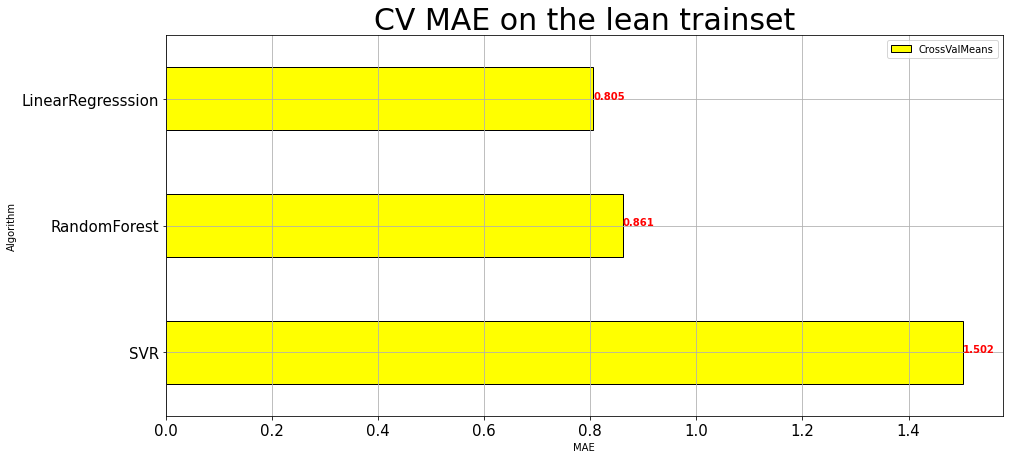

In [44]:
cv1.sort_values('CrossValMeans', ascending = False).plot(x = 'Algorithm', y = 'CrossValMeans', 
        kind = 'barh',color = 'yellow', edgecolor = 'black',figsize=(15, 7))
cv1=cv1.sort_values('CrossValMeans', ascending = False)
for index, value in enumerate(cv1['CrossValMeans']):
    val = '{0:.3f}'.format(value)
    plt.text(value, index,
              str(val),color="red",weight='bold')
                                                                
plt.grid()
plt.title('CV MAE on the lean trainset', size = 30)
plt.yticks(size = 15)
plt.xlabel('MAE')
plt.xticks(size = 15)


### On the full datase

In [45]:
cv2=Cv(X_trainfull,y_train,classifiers)

(array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

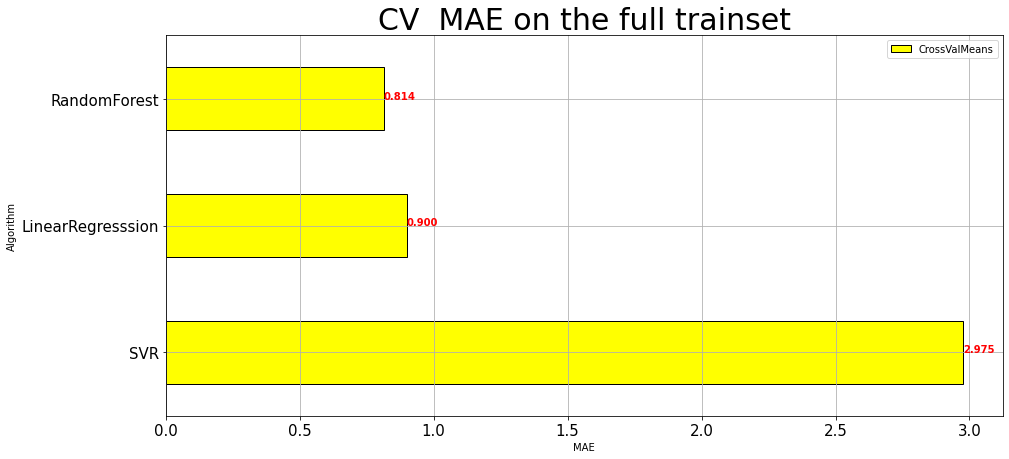

In [46]:
cv2.sort_values('CrossValMeans', ascending = False).plot(x = 'Algorithm', y = 'CrossValMeans', 
        kind = 'barh',color = 'yellow', edgecolor = 'black',figsize=(15, 7))
cv2=cv2.sort_values('CrossValMeans', ascending = False)
for index, value in enumerate(cv2['CrossValMeans']):
    val = '{0:.3f}'.format(value)
    plt.text(value, index,
              str(val),color="red",weight='bold')
                                                                
plt.grid()
plt.title('CV  MAE on the full trainset', size = 30)
plt.yticks(size = 15)
plt.xlabel('MAE')
plt.xticks(size = 15)


Just random forest seems to score better on the full dataset while linear regression and svr seem to prefer the lean dataset. For now i don't trust these score, because except for the linear regression the other 2 models have the default hyperparameter.

In [47]:

y_train = np.array(y_train).reshape((-1, ))
y_test = np.array(y_test).reshape((-1, ))

<a id='the_destination9'></a>
# HYPERPARAMETER TUNING

RandomizedSearchCV randomly passes the set of hyperparameters and calculate the score and gives the best set of hyperparameters which gives the best score as an output.
The random-search is done to SAMPLE (n_iter) values from the parameter space,
exploring it more efficiently (and making better use of computing resources). To gridsearch you can pass only a grid of parameters, to randomizedsearch  you can also pass combinations of:
- distributions
- grids defined by hand
- discrete but dense ranges (np.linspace, but also logspace)



In [48]:
# random forest regressor

param = {
    'n_estimators': [ 500,700],
    'max_features': [int(x) for x in np.arange( 1,  51, 1)],
    'max_depth': [int(x) for x in np.arange( 3, 15 , 1)],
    'criterion': ["absolute_error"]
}

rfr = RandomizedSearchCV(RandomForestRegressor(random_state=60), param, cv=5, scoring='neg_mean_absolute_error',
                               n_jobs = -1,random_state=4)

rfr.fit(X_trainfull, y_train)
                    
print(rfr.best_params_)
print(abs(rfr.best_score_))


{'n_estimators': 500, 'max_features': 38, 'max_depth': 4, 'criterion': 'absolute_error'}
0.6404288712871287


In [49]:
param = {
    'n_estimators': [ 500,700],
    'max_features': [int(x) for x in np.arange( 1,  23, 1)],
    'max_depth': [int(x) for x in np.arange( 3, 15 , 1)],
    'criterion': ["absolute_error"]
}

rfr2 = RandomizedSearchCV(RandomForestRegressor(random_state=60), param, cv=5, scoring='neg_mean_absolute_error',
                               n_jobs = -1,random_state=4)

rfr2.fit(X_train, y_train)
                    
print(rfr2.best_params_)
print(abs(rfr2.best_score_))

{'n_estimators': 500, 'max_features': 19, 'max_depth': 5, 'criterion': 'absolute_error'}
0.6406258217821782


In [50]:
param = {
    'svr__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'svr__epsilon': np.linspace(0,1,50)
}

svr = RandomizedSearchCV(pipez, param, cv=5, scoring='neg_mean_absolute_error',
                               n_jobs = -1,random_state=4)

svr.fit(X_trainfull, y_train)
                    
print(svr.best_params_)
print(abs(svr.best_score_))

{'svr__kernel': 'linear', 'svr__epsilon': 0.44897959183673464}
0.7009495388398467


In [51]:
param = {
    'svr__kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'svr__epsilon': np.linspace(0,1,50)
}

svr2 = RandomizedSearchCV(pipez, param, cv=5, scoring='neg_mean_absolute_error',
                               n_jobs = -1,random_state=4)

svr2.fit(X_train, y_train)
                    
print(svr2.best_params_)
print(abs(svr2.best_score_))

{'svr__kernel': 'linear', 'svr__epsilon': 0.44897959183673464}
0.6999904316247755


In [52]:
m=set(X_trainfull.columns)
n=set(X_train.columns)

In [53]:
m-n

{'Fedu',
 'Fjob_at_home',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'absences_0_10',
 'activities',
 'age_15',
 'age_16',
 'age_17',
 'age_18',
 'cohabitant_parents',
 'famrel',
 'famsize_major3',
 'famsup',
 'guardian_father',
 'guardian_mother',
 'guardian_other',
 'health',
 'internet',
 'nursery',
 'paid',
 'reason_home',
 'reason_other',
 'romantic',
 'schoolsup'}

<a id='the_destination10'></a>
# MODEL EVALUATION WITH LEARNING CURVE

We will now use learning curve to see if we are overfitting on the train set and if having more training sample could help our models to work and predict better.We want also to better understand the bias variance tradeoff of these models.

In [54]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    fig = plt.subplots(figsize = (15,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=train_sizes,scoring='neg_mean_absolute_error',shuffle=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    return plt




### SVR 

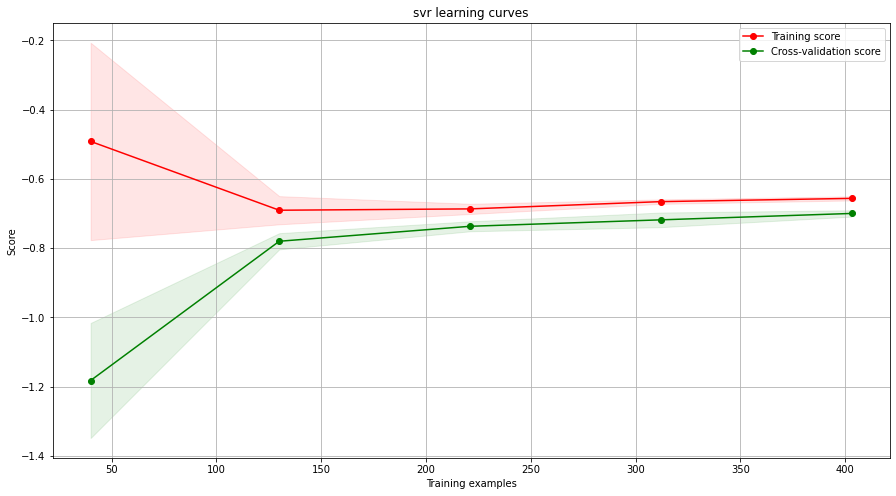

In [55]:
g = plot_learning_curve(svr2,"svr learning curves",X_train,y_train,cv=5)

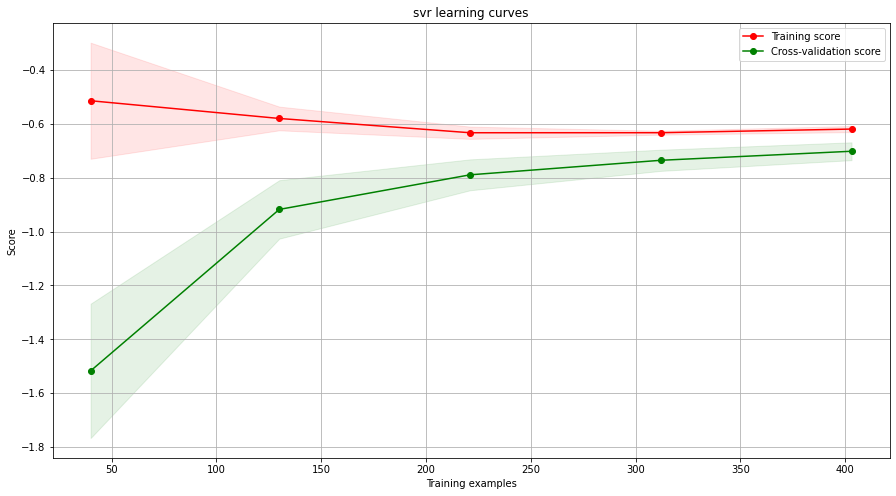

In [56]:
g = plot_learning_curve(svr,"svr learning curves",X_trainfull,y_train,cv=5)

### Linear Regression

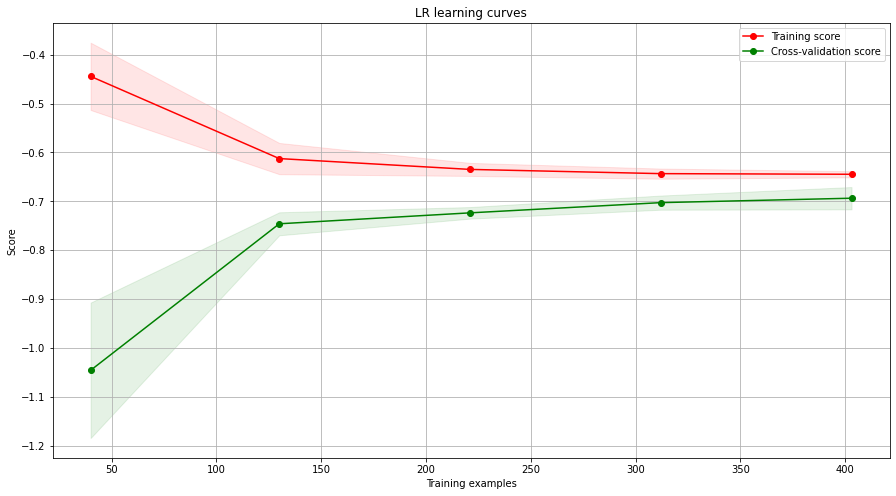

In [57]:
g = plot_learning_curve(pipe,"LR learning curves",X_train,y_train,cv=5)

### Random Forest Regressor

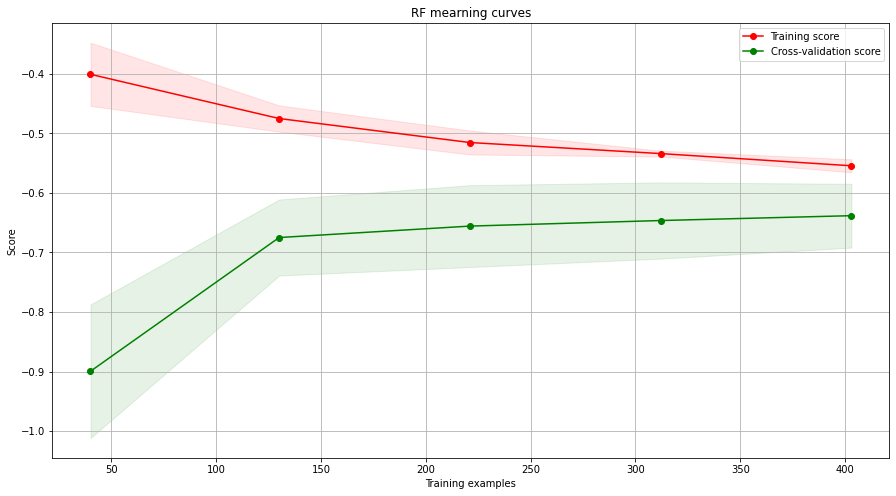

In [58]:
g = plot_learning_curve(rfr.best_estimator_,"RF mearning curves",X_trainfull,y_train,cv=5)

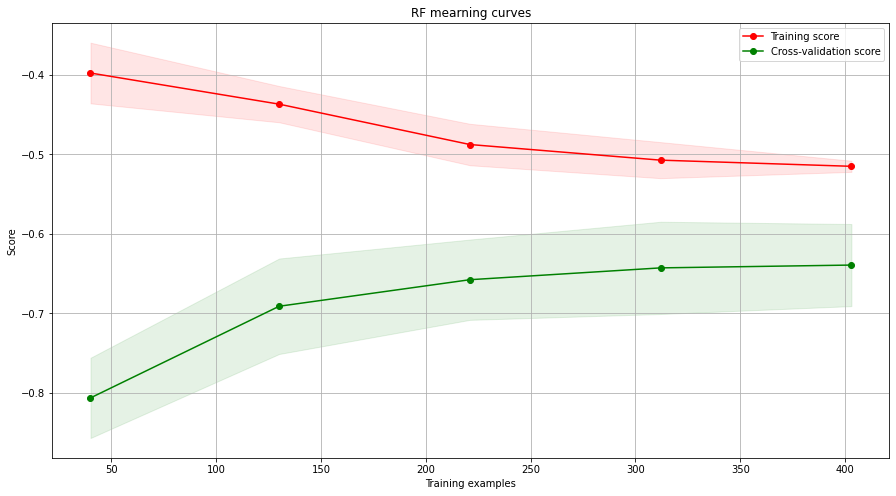

In [59]:
g = plot_learning_curve(rfr2.best_estimator_,"RF mearning curves",X_train,y_train,cv=5)

__N.B= with score here we refear to the MAE so the lower it is the best it is (the higher is the line in the graph the lower is the MAE)__

The above learning curve are all good beacause as the sample size increase the train and the cross validation scores converge to each other.
Random forest  initialy was overfitting  on the training dataset very bad with training score almost equal to 0.2 and the cv validation score very far from the first(causing really high variance). I had to tune max_depth to reduce overfit on training set (prune the trees) and to reduce variance.

## Fitting and evaluating function

In [60]:
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y,X_test):
    
    # Train the model
    model.fit(X, y)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [61]:
from sklearn.model_selection import RandomizedSearchCV

def evaluate(model,X_test):
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae


In [62]:
X_trainfull.shape

(504, 51)

In [63]:
X_train.shape

(504, 22)

<a id='the_destination11'></a>
# PREDICTION

### Linear Regression

In [64]:
lr_mae_full = fit_and_evaluate(pipe,X_trainfull,y_train,X_testfull)
print('svr Performance on the test set(full): MAE = %0.4f' % lr_mae_full)

svr Performance on the test set(full): MAE = 0.6161


In [65]:
lr_mae = fit_and_evaluate(pipe,X_train,y_train,X_test)
print('svr Performance on the test set: MAE = %0.4f' % lr_mae)

svr Performance on the test set: MAE = 0.6323


### random forest

In [66]:

new_random_forest_mae_full = evaluate(rfr,X_testfull)
print('Random Forest Regressor Performance on the test set(full): MAE = %0.4f' % new_random_forest_mae_full)

Random Forest Regressor Performance on the test set(full): MAE = 0.5807


In [67]:
new_random_forest_mae= evaluate(rfr2,X_test)
print('Random Forest Regressor Performance on the test set: MAE = %0.4f' % new_random_forest_mae)

Random Forest Regressor Performance on the test set: MAE = 0.5766


### SVR

In [68]:
svr_mae_full = evaluate(svr,X_testfull)
print('svr Performance on the test set(full): MAE = %0.4f' % svr_mae_full)

svr Performance on the test set(full): MAE = 0.5948


In [69]:
svr_mae = evaluate(svr2,X_test)
print('svr Performance on the test set: MAE = %0.4f' % svr_mae)

svr Performance on the test set: MAE = 0.6133


In [70]:
results = ({
    'ESTIMATOR':["SVR","RandomForestRegressor","LinearRegression"],
    'MAE_FULL_DATASET' :[svr_mae_full,new_random_forest_mae_full,lr_mae_full],
    'MAE_LEAN_DATASET':[svr_mae,new_random_forest_mae,lr_mae],
    
               })
results = pd.DataFrame(results)

In [71]:
results

,ESTIMATOR,MAE_FULL_DATASET,MAE_LEAN_DATASET
0,SVR,0.594788,0.613316
1,RandomForestRegressor,0.580698,0.576571
2,LinearRegression,0.616111,0.632257


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

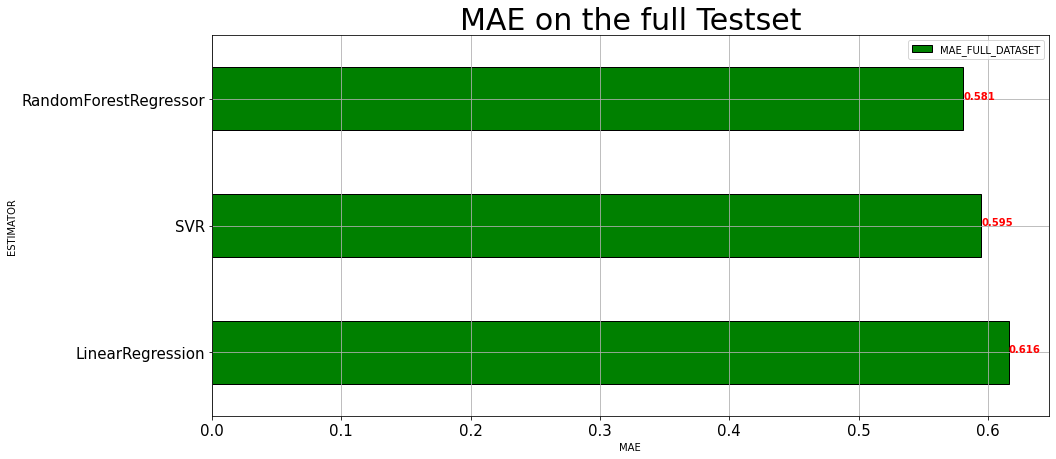

In [72]:

results.sort_values('MAE_FULL_DATASET', ascending = False).plot(x = 'ESTIMATOR', y = 'MAE_FULL_DATASET', 
        kind = 'barh',color = 'green', edgecolor = 'black',figsize=(15, 7))
results=results.sort_values('MAE_FULL_DATASET', ascending = False)
for index, value in enumerate(results['MAE_FULL_DATASET']):
    val = '{0:.3f}'.format(value)
    plt.text(value, index,
              str(val),color="red",weight='bold')
                                                                
plt.grid()
plt.title('MAE on the full Testset', size = 30)
plt.yticks(size = 15)
plt.xlabel('MAE')
plt.xticks(size = 15)


(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

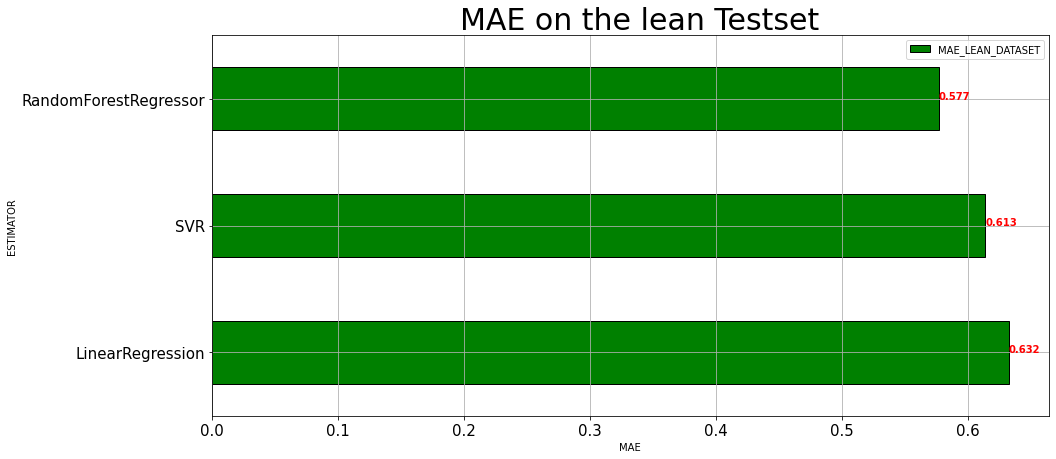

In [73]:
results.sort_values('MAE_LEAN_DATASET', ascending = False).plot(x = 'ESTIMATOR', y = 'MAE_LEAN_DATASET', 
        kind = 'barh',color = 'green', edgecolor = 'black',figsize=(15, 7))

results=results.sort_values('MAE_LEAN_DATASET', ascending = False)
for index, value in enumerate(results['MAE_LEAN_DATASET']):
    val = '{0:.3f}'.format(value)
    plt.text(value, index,
              str(val),color="red",weight='bold')
                                                                
plt.grid()
plt.title('  MAE on the lean Testset', size = 30)
plt.yticks(size = 15)
plt.xlabel('MAE')
plt.xticks(size = 15)


Surprisingly, at least for me, linear regression and Svr perform better in the almost full data set, while random forest perform better on the lean data set. '0.577' is the lowest of our MAE so we will use random forest regressor on the lean dataset for prediction.

<a id='the_destination12'></a>
# RESIDUAL ANALYSIS, WHERE WE FAIL THE MOST?

In [74]:
y_pred=rfr2.predict(X_test)

In [75]:
residuals=y_pred-y_test

In [76]:
residuals.mean()

0.052031746031746054

__In mean we over/underestimate the grade of a student by just 5,2% on data never seen before(test set) with randomn forest trained on the lean dataset__

Relatively of a scale  of 20(the max of the grades scale) the 5,2% is 1,04 so in mean we over/underestimate the grade of a student by 1,04 on the test set

In [77]:
X_test['residuals'] = residuals
X_test['G3']=y_test

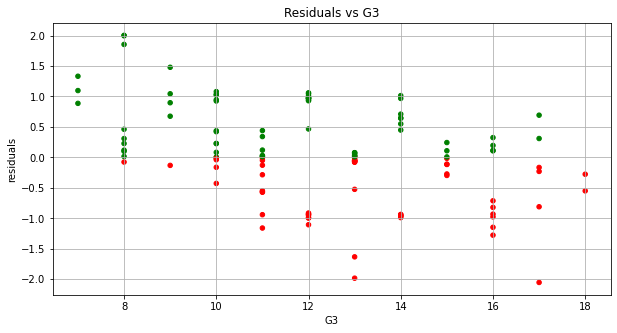

In [78]:
X_test.plot(kind='scatter',x='G3',y='residuals',title=("Residuals vs G3"),
                    figsize=(10,5),
                    color=(X_test["residuals"] > 0).map({True: 'g',
                                                    False: 'r'}))
plt.grid()

Since our residuals are calculated as predictions-real value,if we see a green dot we predicted an higher value compared to  the real value, if we see a red dot we predicted a lower grade compared to the real one. We have really few students that got a grade <8 and a grade >=17 and in this 2 spaces we tend to fail the most in prediction.In particolar we tend to predict higher grade for those students that got 9 or less in G3 and a lower grade to those students that got 17 or more in G3.

From the grades 9 to 16(or even 17) our residuals have almost the same variance enclosed between 1.2 and -1.2.In the grade of 13 we underestimate the grade of few students.At least  we are never wrong by more than two votes in the portugal scale(0 to 20) that compared to italian is just 1 vote( scale0 to 10).

<a id='the_destination13'></a>
# FEATURE IMPORTANCE

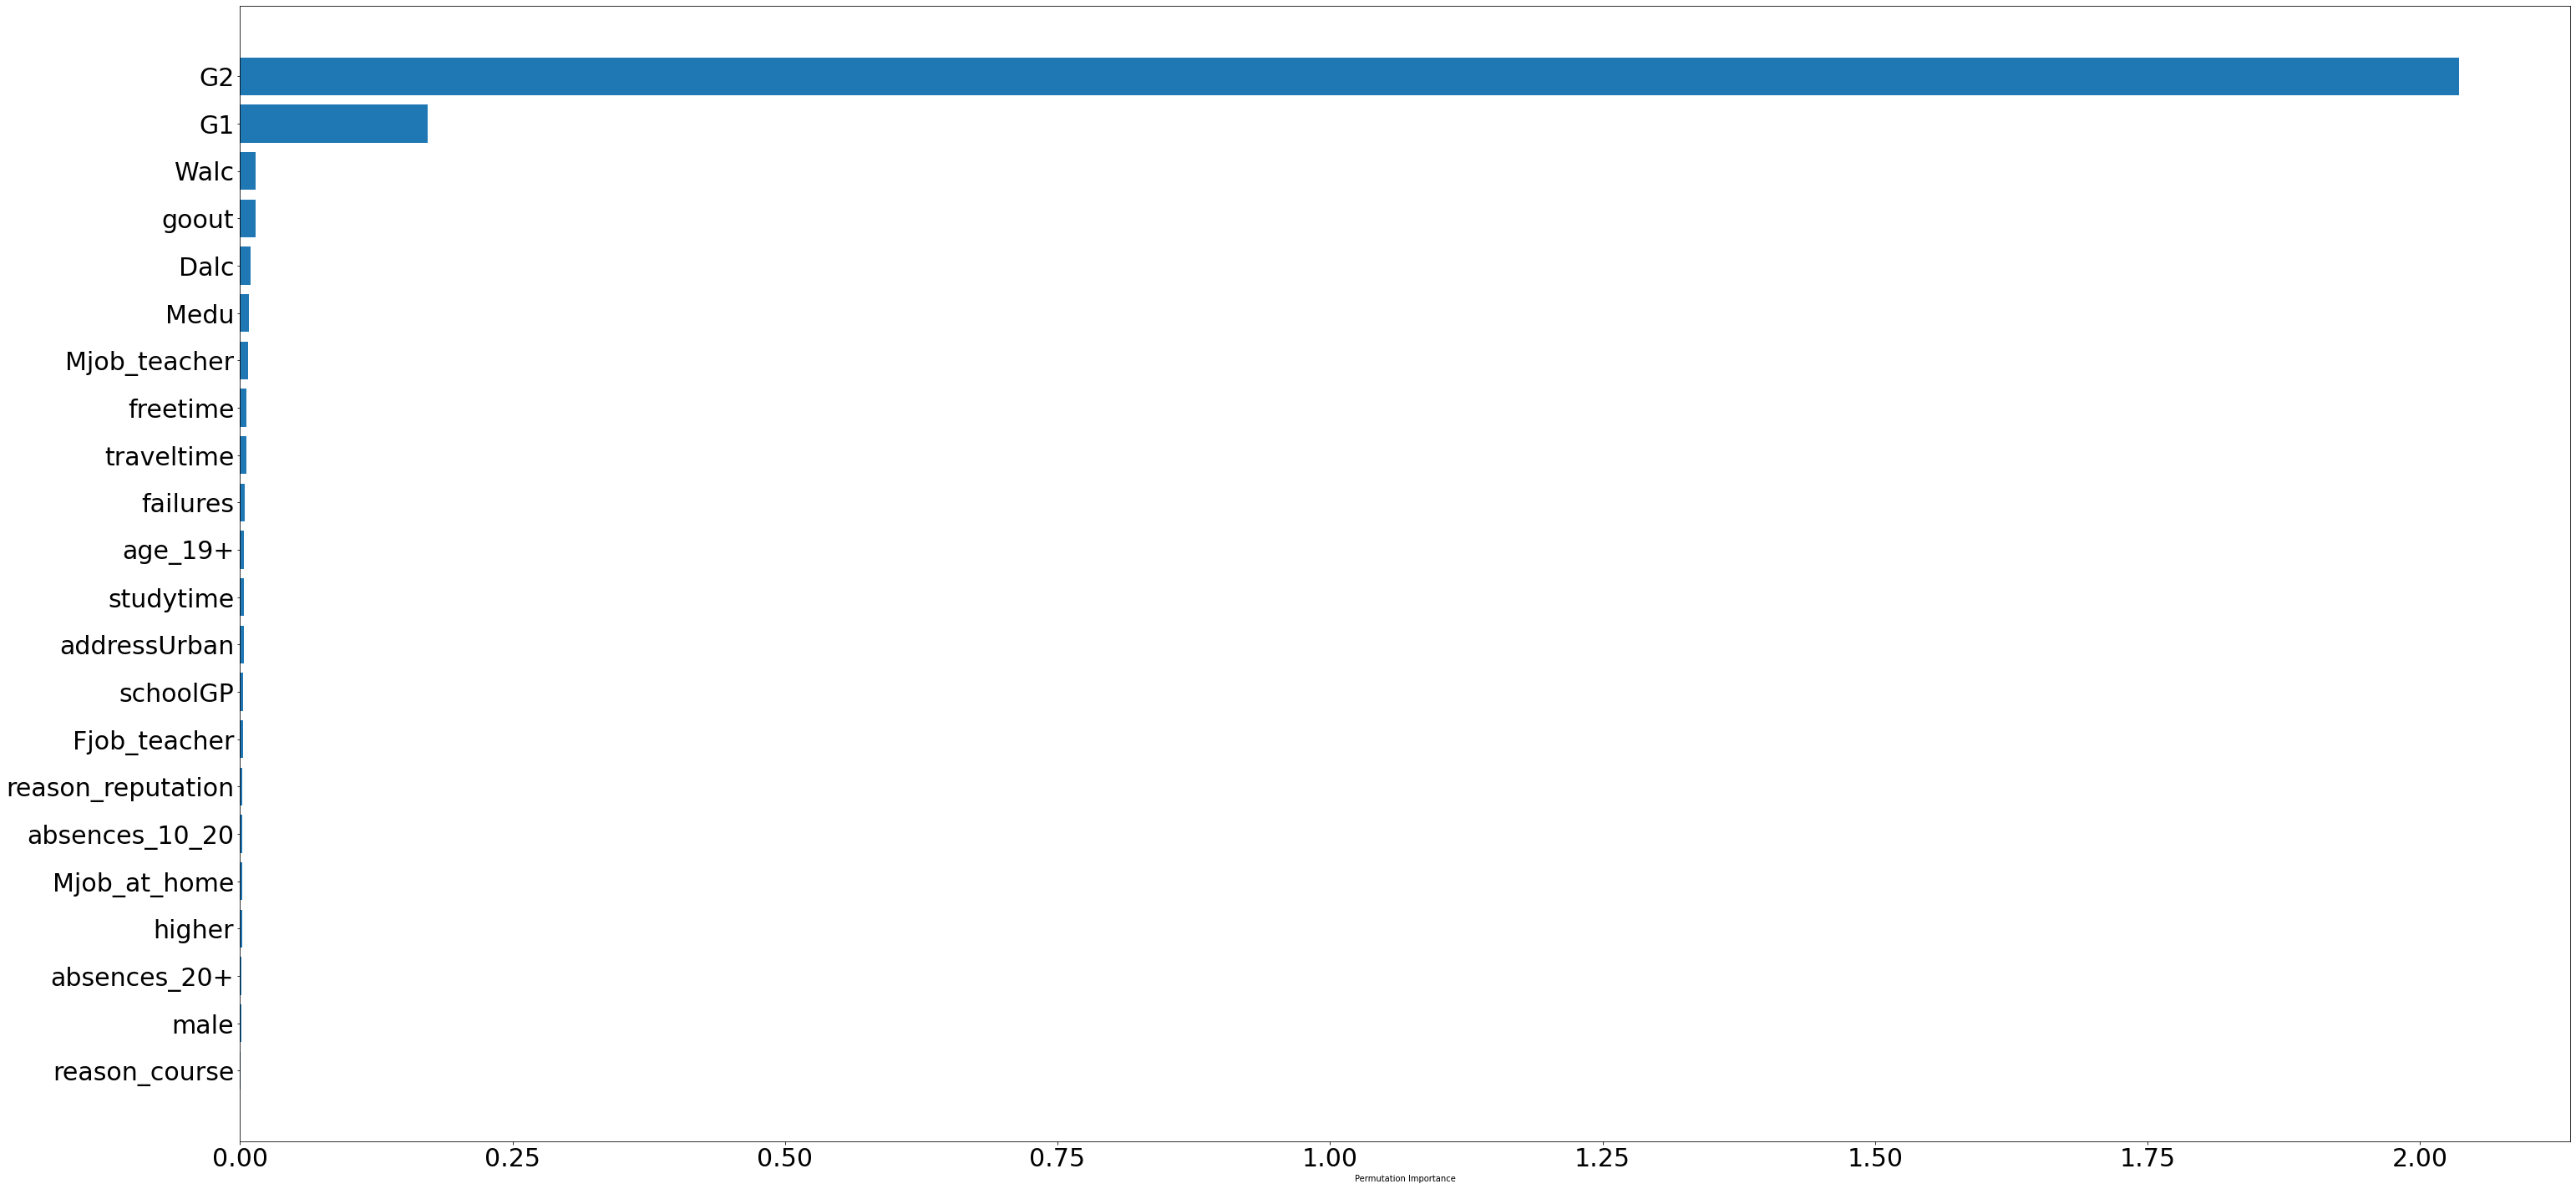

In [79]:
from sklearn.inspection import permutation_importance
# the permutation based importance(accuracy)
perm_importance = permutation_importance(rfr2, X_train, y_train,scoring='neg_mean_absolute_error',
                                         random_state=1)
fig,ax = plt.subplots(figsize = (50,25))
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X_test.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
ax.tick_params(axis='both', which='major', labelsize=30)

In [80]:
importance=({'Features':[i for i in X_test.columns[sorted_idx]],
             'Value':[i for i in perm_importance.importances_mean[sorted_idx]]
             })
importance=pd.DataFrame(importance)

In [81]:
importance.sort_values('Value', ascending=False).reset_index(drop=True)

,Features,Value
0,G2,2.036181
1,G1,0.172078
2,Walc,0.014256
3,goout,0.014227
4,Dalc,0.009700
5,Medu,0.007859
6,Mjob_teacher,0.007462
7,freetime,0.005928
8,traveltime,0.005573
9,failures,0.004343





 When the dataset has two (or more) correlated features, then from the point of view of the model(Random Forest), any of these correlated features can be used as the predictor, with no concrete preference of one over the others.

However once one of them is used, the importance of others is significantly reduced since effectively the impurity they can remove is already removed by the first feature.

As a consequence, they will have a lower reported importance.   when interpreting the data, it can lead to the incorrect conclusion that one of the variables is a strong predictor while the others in the same group are unimportant, while actually they are very close in terms of their relationship with the response variable.


The effect of this phenomenon is somewhat reduced thanks to random selection of features at each node creation, but in general the effect is not removed completely.

So, since  g1  and g2 are highly  correllated(0.88) and  dalc and walk too(0.6), they could tell us the same thing but the model could  prefer 1 rather than the other. But for sure we know that for our best model, that seems good, the best predictors of the vote in G3 are:
<li> the previous grades (g1 and g2)  </li>
<li> how much a student hang out with friends </li>
<li> in general how much a student drinks alchool in the week (weekend included).</li>





Note that for seeing the importance of the rf features i used permutation_importance and not the default rf_feature_importance  because the latter base his calculation on the decrease of impurity amplifying the problem described above.Both methods also tend to create bias for discrete, continuous and multi-categorical variables because it is not certain that the best split will be identified in these or that there is only 1. And how are our top predictors? Discrete and multicategorical, so probably the other variables used are more useful than what permutation_importance tells us


I would like to point out that if we had left the outliers that take 0 with 0 absences, absences could have been a good predictor for a bad model. Out of 245 students(that had 0 absences)about 15 get zero in g3 where the other 12.88 on average. I probably would have predict a value  greater than 10 for those 15 that got zero with 15 very high residuals (10-0=10) with a MAE that would have soared
